# Project 2
### CS 5/7394 - Applied Machine Learning

- **Due** - March 11 @ 11:59 pm pushed to Github repo
- **Teams** - You can do this project solo or in pairs.  Not 3, not 4 not 5... Max of 2. If a 5394 student pairs with a 7394 student, the pair needs to do the 7394 work. 

Below are 6 Kaggle Datasets.  You will choose 1 to work with for this project. 

- [Airfare Prediction Dataset](https://www.kaggle.com/zwartfreak/airline-fare-prediction)
- [Chinese Rest Holiday Dataset](https://www.kaggle.com/holoong9291/chinese-rest-holiday-dataset-2020-to-2022)
- [Jigsaw Toxic Comment Classification Challenge](https://www.kaggle.com/julian3833/jigsaw-toxic-comment-classification-challenge?select=train.csv)
- [Latest Covid 19 Dataset Worldwide](https://www.kaggle.com/sandhyakrishnan02/latest-covid-19-dataset-worldwide)
- [Trains](https://www.kaggle.com/vahidehdashti/machinelearningdatabase-trains?select=trains-original.data)
- [Football Data top 5 Leagues](https://www.kaggle.com/sanjeetsinghnaik/football-data-top-5-leagues)

Merging disparate datasets is a staple of the data exploration process.  Therefore, for which ever data set above that you choose, you will need to independently find **an additional** dataset to merge with your selection.  The only requirement is that it add to the richness of the original dataset. Students in the 7000-level version of the class need to find two additional data sets to merge with the original selection. 

_Note_: If you want to start with a different data set, you need to get Fontenot's OK first.  

### Your Tasks

Below, there are cells that provide directions on what to do for the project.  

You can insert as many cells between the ones below as you'd like, but please **Do NOT** change the cells already provided. 

### Part 1 - Getting Started

- Import libraries
- Load original Data (which ever one you chose from the provided list) into a data frame. 
- Load your additional data set(s) into a data frame. 
- In a markdown cell, provide a brief description of your the data sets you've chosen to work with.  
- Develop a list of 3 - 4 questions that you hope to be able to answer after the exploration of the data and write them in this section. 

## Dataset summary
- the intial dataset contains a number of football fixtures from the top five leagues in europe
  - each observation/fixture contains attributes such as goals for each team, match excitement among other things
- the supplementary dataset has a similar format but conatains odds from many bookmakers accross the internet
  - it also has more detailed statistics including halftime statistics

### Questions
1. What team beats the odds the most often in each league?
2. which league is most prone to upsets?
3. which team has the biggest homecourt advantage?
4. which teams are the best on the road?

In [1]:
# data manipulation
import numpy as np
import pandas as pd
%matplotlib inline

# modeling utilities
import scipy.stats as stats
from sklearn import metrics
from sklearn import preprocessing
from sklearn import  linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict

# plotting libraries
import matplotlib.pyplot as plt
import seaborn as sn
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (30, 10),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}

sn.set_style('whitegrid')
sn.set_context('talk')
plt.rcParams.update(params)
pd.options.display.max_colwidth = 600

In [2]:
metadata = pd.read_csv('combined_data.csv')
metadata.head()

,Unnamed: 0,Home Team,Away Team,Score,Half Time Score,Match Excitement,Home Team Rating,Away Team Rating,Home Team Possession %,Away Team Possession %,...,Away Team Fouls,Away Team Yellow Cards,Away Team Second Yellow Cards,Away Team Red Cards,Home Team Goals Scored,Away Team Goals Scored,Home Team Goals Conceeded,Away Team Goals Conceeded,year,league
0,0,MAN UTD,SWANSEA,1-2,0-1,5.9,5.6,7.6,60,40,...,20.0,4.0,0.0,0.0,1,2,2,1,2014,english
1,1,WEST BROM,SUNDERLAND,2-2,1-1,7.3,6.5,7.4,58,42,...,9.0,1.0,0.0,0.0,2,2,2,2,2014,english
2,2,LEICESTER CITY,EVERTON,2-2,1-2,7.0,6.5,6.3,37,63,...,10.0,1.0,0.0,0.0,2,2,2,2,2014,english
3,3,WEST HAM,TOTTENHAM,0-1,0-0,4.8,5.9,6.4,47,53,...,10.0,0.0,0.0,1.0,0,1,1,0,2014,english
4,4,QPR,HULL CITY,0-1,0-0,3.8,5.7,6.6,51,49,...,10.0,2.0,0.0,0.0,0,1,1,0,2014,english


In [3]:
metadata["league"].value_counts()

english    2660
spanish    2660
italian    2658
french     2554
german     1530
Name: league, dtype: int64

### Part 2 - Data Inspection

Write some code to summarize the datasets.  Think about the following questions:
- What type of data is each variable? (think like a data scientist here, not a computer scientist)
- What is the total size of the data sets?
- What time boundaries are there in the dataset?  IOW, what time frame do they span?
- Are there any missing values in any of the variables? 

Do this with Intentionality.  Don't skimp. 

In [4]:
metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12062 entries, 0 to 12061
Data columns (total 42 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     12062 non-null  int64  
 1   Home Team                      12062 non-null  object 
 2   Away Team                      12062 non-null  object 
 3   Score                          12062 non-null  object 
 4   Half Time Score                12062 non-null  object 
 5   Match Excitement               12062 non-null  float64
 6   Home Team Rating               12062 non-null  float64
 7   Away Team Rating               12062 non-null  float64
 8   Home Team Possession %         12062 non-null  int64  
 9   Away Team Possession %         12062 non-null  int64  
 10  Home Team Off Target Shots     12062 non-null  float64
 11  Home Team On Target Shots      12062 non-null  float64
 12  Home Team Total Shots          12062 non-null 

In [5]:
metadata.describe()

,Unnamed: 0,Match Excitement,Home Team Rating,Away Team Rating,Home Team Possession %,Away Team Possession %,Home Team Off Target Shots,Home Team On Target Shots,Home Team Total Shots,Home Team Blocked Shots,...,Away Team Clearances,Away Team Fouls,Away Team Yellow Cards,Away Team Second Yellow Cards,Away Team Red Cards,Home Team Goals Scored,Away Team Goals Scored,Home Team Goals Conceeded,Away Team Goals Conceeded,year
count,12062.000000,12062.000000,12062.000000,12062.000000,12062.000000,12062.000000,12062.000000,12062.000000,12062.000000,12062.000000,...,12062.000000,12062.000000,12062.000000,12062.000000,12062.000000,12062.000000,12062.000000,12062.000000,12062.000000,12062.000000
mean,6030.500000,5.391494,6.399702,6.142539,51.199469,48.800531,5.644338,4.723180,13.690764,3.338501,...,22.792323,13.083154,2.162245,0.060852,0.057785,1.531172,1.206351,1.206351,1.531172,2017.109352
std,3482.143808,1.719655,0.988037,0.992074,11.275257,11.275257,2.781520,2.559607,5.244448,2.246498,...,10.141781,4.205046,1.365581,0.244216,0.243772,1.305178,1.168266,1.168266,1.305178,1.965096
min,0.000000,1.400000,2.100000,1.300000,17.000000,16.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2014.000000
25%,3015.250000,4.100000,5.700000,5.500000,43.000000,41.000000,4.000000,3.000000,10.000000,2.000000,...,15.000000,10.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,2015.000000
50%,6030.500000,5.300000,6.400000,6.100000,51.000000,49.000000,5.000000,4.000000,13.000000,3.000000,...,22.000000,13.000000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2017.000000
75%,9045.750000,6.400000,7.000000,6.800000,59.000000,57.000000,7.000000,6.000000,17.000000,5.000000,...,29.000000,16.000000,3.000000,0.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2019.000000
max,12061.000000,10.000000,10.000000,10.000000,84.000000,83.000000,20.000000,18.000000,47.000000,19.000000,...,79.000000,32.000000,9.000000,2.000000,2.000000,10.000000,9.000000,9.000000,10.000000,2020.000000


In [6]:
leagues = metadata.groupby(by='league')
leagues.mean()

,Unnamed: 0,Match Excitement,Home Team Rating,Away Team Rating,Home Team Possession %,Away Team Possession %,Home Team Off Target Shots,Home Team On Target Shots,Home Team Total Shots,Home Team Blocked Shots,...,Away Team Clearances,Away Team Fouls,Away Team Yellow Cards,Away Team Second Yellow Cards,Away Team Red Cards,Home Team Goals Scored,Away Team Goals Scored,Home Team Goals Conceeded,Away Team Goals Conceeded,year
league,,,,,,,,,,,,,,,,,,,,,
english,1329.5,5.348571,6.476692,6.238797,51.321429,48.678571,5.378947,4.670677,13.858271,3.818045,...,26.070301,10.986466,1.757143,0.035338,0.040602,1.504511,1.207143,1.207143,1.504511,2017.000000
french,3936.5,5.207596,6.402388,6.147220,51.459280,48.540720,5.621770,4.539546,13.162882,3.031323,...,22.571261,13.348081,1.938528,0.051292,0.090446,1.469460,1.133125,1.133125,1.469460,2016.918168
german,5978.5,5.619542,6.400719,6.161961,51.173856,48.826144,5.669935,4.966013,13.909804,3.287582,...,20.293464,13.250980,1.929412,0.049673,0.035294,1.677124,1.339216,1.339216,1.677124,2018.000000
italian,8072.5,5.622460,6.350527,6.128066,50.500000,49.500000,6.028593,4.887133,14.517306,3.609105,...,22.528593,14.142588,2.437547,0.085403,0.065463,1.546652,1.264861,1.264861,1.546652,2016.999248
spanish,10731.5,5.249023,6.368684,6.045075,51.541729,48.458271,5.532707,4.648496,13.078195,2.912782,...,21.427444,13.770301,2.640977,0.077444,0.048872,1.517669,1.140977,1.140977,1.517669,2017.000000


### Part 3 - Merge the data

Now that you have a better feel for each of your two (or three, for the 7394 students) data sets, it is time to merge them. Describe your strategy for merging the data sets and then actually perform the merge.

Develop a strategy for verifying that the data is properly merged (hoping and finger-crossing are not valid strategies).

## Spanish Data Merging
#### 2014-2015 season

In [7]:
spanish = leagues.get_group('spanish')
spg_by_years = spanish.groupby('year')

In [8]:
#2014 dataset merging
df2014 = spg_by_years.get_group(2014)
dfdates = pd.read_csv('spanish-la-liga_zip/archive/season-1415.csv')
dfdates['HomeTeam'] = dfdates['HomeTeam'].str.upper()
dfdates['AwayTeam'] = dfdates['AwayTeam'].str.upper()
t1 = df2014['Home Team'].unique()
t2 = dfdates['HomeTeam'].unique()

# dfjoin = pd.merge(dfdates,df2014, left_on=['HomeTeam','AwayTeam'], right_on=['Home Team', 'Away Team'])
# dfjoin.head()
names = dict()
t1.sort()
t2.sort()
for i in range(len(t1)):
    names[t2[i]] = t1[i]


In [9]:
names['EIBAR'] = 'EIBAR'
names['ESPANYOL'] = 'ESPANOL'
names['ELCHE'] = 'ELCHE'
names['GETAFE'] = 'GETAFE'
names['GRANADA'] = 'GRANADA'
names['DEPORTIVE'] = 'LA CORUNA'
names['RAYO VALLECANO'] = 'VALLECANO'
names['REAL MADRID'] = 'REAL MADRID'
names['SEVILLA FC'] = 'SEVILLA'
names['VALENCIA'] = 'VALENCIA'


In [10]:
print(names)

{'ALMERIA': 'ALMERÍA', 'ATH BILBAO': 'ATHLETIC', 'ATH MADRID': 'ATLETICO MADRID', 'BARCELONA': 'BARCELONA', 'CELTA': 'CELTA', 'CORDOBA': 'CÓRDOBA', 'EIBAR': 'EIBAR', 'ELCHE': 'ELCHE', 'ESPANOL': 'ELCHE', 'GETAFE': 'GETAFE', 'GRANADA': 'GRANADA', 'LA CORUNA': 'GRANADA', 'LEVANTE': 'LEVANTE', 'MALAGA': 'MÁLAGA', 'REAL MADRID': 'REAL MADRID', 'SEVILLA': 'REAL MADRID', 'SOCIEDAD': 'REAL SOCIEDAD', 'VALENCIA': 'VALENCIA', 'VALLECANO': 'VALENCIA', 'VILLARREAL': 'VILLARREAL', 'ESPANYOL': 'ESPANOL', 'DEPORTIVE': 'LA CORUNA', 'RAYO VALLECANO': 'VALLECANO', 'SEVILLA FC': 'SEVILLA'}


In [11]:
dfdates['HomeTeam'] = dfdates['HomeTeam'].apply(lambda x: names[x])
dfdates['AwayTeam'] = dfdates['AwayTeam'].apply(lambda x: names[x])
print(dfdates['AwayTeam'].unique())

['ELCHE' 'GRANADA' 'ATHLETIC' 'VALENCIA' 'GETAFE' 'REAL SOCIEDAD'
 'VILLARREAL' 'CÓRDOBA' 'ATLETICO MADRID' 'ALMERÍA' 'MÁLAGA' 'LEVANTE'
 'EIBAR' 'CELTA' 'REAL MADRID' 'BARCELONA']


In [12]:
df2014.head()

,Unnamed: 0,Home Team,Away Team,Score,Half Time Score,Match Excitement,Home Team Rating,Away Team Rating,Home Team Possession %,Away Team Possession %,...,Away Team Fouls,Away Team Yellow Cards,Away Team Second Yellow Cards,Away Team Red Cards,Home Team Goals Scored,Away Team Goals Scored,Home Team Goals Conceeded,Away Team Goals Conceeded,year,league
9402,9402,MÁLAGA,ATHLETIC,1-0,1-0,4.4,6.0,5.7,40,60,...,9.0,3.0,0.0,0.0,1,0,0,1,2014,spanish
9403,9403,SEVILLA FC,VALENCIA,1-1,1-0,4.7,6.5,6.8,47,53,...,8.0,2.0,0.0,1.0,1,1,1,1,2014,spanish
9404,9404,GRANADA,DEPORTIVO,2-1,0-1,4.6,7.2,5.9,53,47,...,26.0,3.0,0.0,0.0,2,1,1,2,2014,spanish
9405,9405,ALMERÍA,ESPANYOL,1-1,0-0,5.6,6.9,5.5,56,44,...,9.0,3.0,1.0,0.0,1,1,1,1,2014,spanish
9406,9406,EIBAR,REAL SOCIEDAD,1-0,1-0,3.7,6.5,5.9,41,59,...,14.0,1.0,0.0,0.0,1,0,0,1,2014,spanish


In [13]:
sp2014combo = pd.merge(dfdates, df2014, left_on=['HomeTeam','AwayTeam'], right_on=['Home Team', 'Away Team'])
sp2014combo.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,Away Team Fouls,Away Team Yellow Cards,Away Team Second Yellow Cards,Away Team Red Cards,Home Team Goals Scored,Away Team Goals Scored,Home Team Goals Conceeded,Away Team Goals Conceeded,year,league
0,SP1,23/08/14,ALMERÍA,ELCHE,1,1,D,0,0,D,...,19.0,5.0,1.0,0.0,2,2,2,2,2014,spanish
1,SP1,04/10/14,ALMERÍA,ELCHE,2,2,D,1,1,D,...,19.0,5.0,1.0,0.0,2,2,2,2,2014,spanish
2,SP1,23/08/14,MÁLAGA,ATHLETIC,1,0,H,1,0,H,...,9.0,3.0,0.0,0.0,1,0,0,1,2014,spanish
3,SP1,23/08/14,REAL MADRID,VALENCIA,1,1,D,1,0,H,...,19.0,4.0,0.0,0.0,2,2,2,2,2014,spanish
4,SP1,08/11/14,REAL MADRID,VALENCIA,5,1,H,2,1,H,...,19.0,4.0,0.0,0.0,2,2,2,2,2014,spanish


#### 2015-2016 season

In [14]:
#2015 dataset merging
df2015 = spg_by_years.get_group(2015)
dfdates = pd.read_csv('spanish-la-liga_zip/archive/season-1516.csv')
dfdates['HomeTeam'] = dfdates['HomeTeam'].str.upper()
dfdates['AwayTeam'] = dfdates['AwayTeam'].str.upper()
t1 = df2015['Home Team'].unique()
t2 = dfdates['HomeTeam'].unique()

names = dict()
t1.sort()
t2.sort()
for i in range(len(t1)):
    print(t2[i] + '--' + t1[i])
    names[t2[i]] = t1[i]

ATH BILBAO--ATHLETIC
ATH MADRID--ATLETICO MADRID
BARCELONA--BARCELONA
BETIS--CELTA
CELTA--DEPORTIVO
EIBAR--EIBAR
ESPANOL--ESPANYOL
GETAFE--GETAFE
GRANADA--GIJÓN
LA CORUNA--GRANADA
LAS PALMAS--LAS PALMAS
LEVANTE--LEVANTE
MALAGA--MÁLAGA
REAL MADRID--RAYO VALLECANO
SEVILLA--REAL BETIS
SOCIEDAD--REAL MADRID
SP GIJON--REAL SOCIEDAD
VALENCIA--SEVILLA FC
VALLECANO--VALENCIA
VILLARREAL--VILLARREAL


In [15]:
names['BETIS'] = 'REAL BETIS'
names['GRANADA'] = 'GRANADA'
names['LA CORUNA'] = 'DEPORTIVO'
names['CELTA'] = 'CELTA'
names['GRANADA'] = 'GRANADA'
names['REAL MADRID'] = 'REAL MADRID'
names['SEVILLA'] = 'SEVILLA FC'
names['SOCIEDAD'] = 'REAL SOCIEDAD'
names['SP GIJON'] = 'GIJÓN'
names['VALENCIA'] = 'VALENCIA'
names['VALLECANO'] = 'RAYO VALLECANO'
print(names)

{'ATH BILBAO': 'ATHLETIC', 'ATH MADRID': 'ATLETICO MADRID', 'BARCELONA': 'BARCELONA', 'BETIS': 'REAL BETIS', 'CELTA': 'CELTA', 'EIBAR': 'EIBAR', 'ESPANOL': 'ESPANYOL', 'GETAFE': 'GETAFE', 'GRANADA': 'GRANADA', 'LA CORUNA': 'DEPORTIVO', 'LAS PALMAS': 'LAS PALMAS', 'LEVANTE': 'LEVANTE', 'MALAGA': 'MÁLAGA', 'REAL MADRID': 'REAL MADRID', 'SEVILLA': 'SEVILLA FC', 'SOCIEDAD': 'REAL SOCIEDAD', 'SP GIJON': 'GIJÓN', 'VALENCIA': 'VALENCIA', 'VALLECANO': 'RAYO VALLECANO', 'VILLARREAL': 'VILLARREAL'}


In [16]:
dfdates['HomeTeam'] = dfdates['HomeTeam'].apply(lambda x: names[x])
dfdates['AwayTeam'] = dfdates['AwayTeam'].apply(lambda x: names[x])
print(dfdates['AwayTeam'].unique())

['SEVILLA FC' 'LAS PALMAS' 'GETAFE' 'REAL SOCIEDAD' 'VALENCIA' 'BARCELONA'
 'VILLARREAL' 'CELTA' 'REAL MADRID' 'EIBAR' 'ESPANYOL' 'MÁLAGA'
 'RAYO VALLECANO' 'REAL BETIS' 'GIJÓN' 'ATHLETIC' 'GRANADA' 'LEVANTE'
 'ATLETICO MADRID' 'DEPORTIVO']


In [17]:
sp2015combo = pd.merge(dfdates, df2015, left_on=['HomeTeam','AwayTeam'], right_on=['Home Team', 'Away Team'])
sp2015combo.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,Away Team Fouls,Away Team Yellow Cards,Away Team Second Yellow Cards,Away Team Red Cards,Home Team Goals Scored,Away Team Goals Scored,Home Team Goals Conceeded,Away Team Goals Conceeded,year,league
0,SP1,21/08/15,MÁLAGA,SEVILLA FC,0,0,D,0,0,D,...,11.0,4.0,1.0,0.0,0,0,0,0,2015,spanish
1,SP1,22/08/15,ATLETICO MADRID,LAS PALMAS,1,0,H,1,0,H,...,16.0,0.0,0.0,0.0,1,0,0,1,2015,spanish
2,SP1,22/08/15,ESPANYOL,GETAFE,1,0,H,1,0,H,...,14.0,4.0,1.0,0.0,1,0,0,1,2015,spanish
3,SP1,22/08/15,DEPORTIVO,REAL SOCIEDAD,0,0,D,0,0,D,...,10.0,2.0,0.0,0.0,0,0,0,0,2015,spanish
4,SP1,22/08/15,RAYO VALLECANO,VALENCIA,0,0,D,0,0,D,...,11.0,1.0,0.0,0.0,0,0,0,0,2015,spanish


#### 2016-2017 season

In [18]:
#2016 dataset merging
df2016 = spg_by_years.get_group(2016)
dfdates = pd.read_csv('spanish-la-liga_zip/archive/season-1617.csv')
dfdates['HomeTeam'] = dfdates['HomeTeam'].str.upper()
dfdates['AwayTeam'] = dfdates['AwayTeam'].str.upper()
t1 = df2016['Home Team'].unique()
t2 = dfdates['HomeTeam'].unique()

names = dict()
t1.sort()
t2.sort()
for i in range(len(t1)):
    print(t2[i] + '--' + t1[i])
    names[t2[i]] = t1[i]

ALAVES--ALAVÉS
ATH BILBAO--ATHLETIC
ATH MADRID--ATLETICO MADRID
BARCELONA--BARCELONA
BETIS--CELTA
CELTA--DEPORTIVO
EIBAR--EIBAR
ESPANOL--ESPANYOL
GRANADA--GIJÓN
LA CORUNA--GRANADA
LAS PALMAS--LAS PALMAS
LEGANES--LEGANÉS
MALAGA--MÁLAGA
OSASUNA--OSASUNA
REAL MADRID--REAL BETIS
SEVILLA--REAL MADRID
SOCIEDAD--REAL SOCIEDAD
SP GIJON--SEVILLA FC
VALENCIA--VALENCIA
VILLARREAL--VILLARREAL


In [19]:
names['BETIS'] = 'REAL BETIS'
names['CELTA'] = 'CELTA'
names['LA CORUNA'] = 'DEPORTIVO'
names['GRANADA'] = 'GRANADA'
names['SP GIJON'] = 'GIJÓN'
names['REAL MADRID'] = 'REAL MADRID'
names['SEVILLA'] = 'SEVILLA FC'
names['GRANADA'] = 'GRANADA'


names['SOCIEDAD'] = 'REAL SOCIEDAD'

names['VALENCIA'] = 'VALENCIA'
print(names)

{'ALAVES': 'ALAVÉS', 'ATH BILBAO': 'ATHLETIC', 'ATH MADRID': 'ATLETICO MADRID', 'BARCELONA': 'BARCELONA', 'BETIS': 'REAL BETIS', 'CELTA': 'CELTA', 'EIBAR': 'EIBAR', 'ESPANOL': 'ESPANYOL', 'GRANADA': 'GRANADA', 'LA CORUNA': 'DEPORTIVO', 'LAS PALMAS': 'LAS PALMAS', 'LEGANES': 'LEGANÉS', 'MALAGA': 'MÁLAGA', 'OSASUNA': 'OSASUNA', 'REAL MADRID': 'REAL MADRID', 'SEVILLA': 'SEVILLA FC', 'SOCIEDAD': 'REAL SOCIEDAD', 'SP GIJON': 'GIJÓN', 'VALENCIA': 'VALENCIA', 'VILLARREAL': 'VILLARREAL'}


In [20]:
dfdates['HomeTeam'] = dfdates['HomeTeam'].apply(lambda x: names[x])
dfdates['AwayTeam'] = dfdates['AwayTeam'].apply(lambda x: names[x])
print(dfdates['AwayTeam'].unique())

['EIBAR' 'OSASUNA' 'REAL BETIS' 'VILLARREAL' 'ESPANYOL' 'ALAVÉS'
 'REAL MADRID' 'ATHLETIC' 'LEGANÉS' 'LAS PALMAS' 'DEPORTIVO' 'MÁLAGA'
 'VALENCIA' 'ATLETICO MADRID' 'REAL SOCIEDAD' 'CELTA' 'GIJÓN' 'BARCELONA'
 'GRANADA' 'SEVILLA FC']


In [21]:
sp2016combo = pd.merge(dfdates, df2016, left_on=['HomeTeam','AwayTeam'], right_on=['Home Team', 'Away Team'])
sp2016combo.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,Away Team Fouls,Away Team Yellow Cards,Away Team Second Yellow Cards,Away Team Red Cards,Home Team Goals Scored,Away Team Goals Scored,Home Team Goals Conceeded,Away Team Goals Conceeded,year,league
0,SP1,19/08/16,DEPORTIVO,EIBAR,2,1,H,0,0,D,...,18.0,3.0,0.0,0.0,2,1,1,2,2016,spanish
1,SP1,19/08/16,MÁLAGA,OSASUNA,1,1,D,0,0,D,...,23.0,3.0,0.0,0.0,1,1,1,1,2016,spanish
2,SP1,20/08/16,BARCELONA,REAL BETIS,6,2,H,3,1,H,...,13.0,3.0,0.0,0.0,6,2,2,6,2016,spanish
3,SP1,20/08/16,GRANADA,VILLARREAL,1,1,D,0,0,D,...,11.0,3.0,0.0,0.0,1,1,1,1,2016,spanish
4,SP1,20/08/16,SEVILLA FC,ESPANYOL,6,4,H,3,3,D,...,15.0,2.0,0.0,0.0,6,4,4,6,2016,spanish


#### 2017-2018 season

In [22]:
#2017 dataset merging
df2017 = spg_by_years.get_group(2017)
dfdates = pd.read_csv('spanish-la-liga_zip/archive/season-1718.csv')
dfdates['HomeTeam'] = dfdates['HomeTeam'].str.upper()
dfdates['AwayTeam'] = dfdates['AwayTeam'].str.upper()
t1 = df2017['Home Team'].unique()
t2 = dfdates['HomeTeam'].unique()

names = dict()
t1.sort()
t2.sort()
for i in range(len(t1)):
    print(t2[i] + '--' + t1[i])
    names[t2[i]] = t1[i]

ALAVES--ALAVÉS
ATH BILBAO--ATHLETIC
ATH MADRID--ATLETICO MADRID
BARCELONA--BARCELONA
BETIS--CELTA
CELTA--DEPORTIVO
EIBAR--EIBAR
ESPANOL--ESPANYOL
GETAFE--GETAFE
GIRONA--GIRONA
LA CORUNA--LAS PALMAS
LAS PALMAS--LEGANÉS
LEGANES--LEVANTE
LEVANTE--MÁLAGA
MALAGA--REAL BETIS
REAL MADRID--REAL MADRID
SEVILLA--REAL SOCIEDAD
SOCIEDAD--SEVILLA FC
VALENCIA--VALENCIA
VILLARREAL--VILLARREAL


In [23]:
names['BETIS'] = 'REAL BETIS'
names['CELTA'] = 'CELTA'
names['LA CORUNA'] = 'DEPORTIVO'
names['GRANADA'] = 'GRANADA'
names['SP GIJON'] = 'GIJÓN'
names['LAS PALMAS']= 'LAS PALMAS'
names['LEGANES'] = 'LEGANÉS'
names['LEVANTE'] = 'LEVANTE'
names['MALAGA'] = 'MÁLAGA'
names['SEVILLA'] = 'SEVILLA FC'
names['SOCIEDAD'] = 'REAL SOCIEDAD'
print(names)

{'ALAVES': 'ALAVÉS', 'ATH BILBAO': 'ATHLETIC', 'ATH MADRID': 'ATLETICO MADRID', 'BARCELONA': 'BARCELONA', 'BETIS': 'REAL BETIS', 'CELTA': 'CELTA', 'EIBAR': 'EIBAR', 'ESPANOL': 'ESPANYOL', 'GETAFE': 'GETAFE', 'GIRONA': 'GIRONA', 'LA CORUNA': 'DEPORTIVO', 'LAS PALMAS': 'LAS PALMAS', 'LEGANES': 'LEGANÉS', 'LEVANTE': 'LEVANTE', 'MALAGA': 'MÁLAGA', 'REAL MADRID': 'REAL MADRID', 'SEVILLA': 'SEVILLA FC', 'SOCIEDAD': 'REAL SOCIEDAD', 'VALENCIA': 'VALENCIA', 'VILLARREAL': 'VILLARREAL', 'GRANADA': 'GRANADA', 'SP GIJON': 'GIJÓN'}


In [24]:
dfdates['HomeTeam'] = dfdates['HomeTeam'].apply(lambda x: names[x])
dfdates['AwayTeam'] = dfdates['AwayTeam'].apply(lambda x: names[x])
print(dfdates['AwayTeam'].unique())

['ALAVÉS' 'LAS PALMAS' 'REAL SOCIEDAD' 'ATLETICO MADRID' 'ESPANYOL'
 'GETAFE' 'REAL BETIS' 'REAL MADRID' 'VILLARREAL' 'EIBAR' 'CELTA'
 'BARCELONA' 'MÁLAGA' 'DEPORTIVO' 'ATHLETIC' 'LEGANÉS' 'SEVILLA FC'
 'VALENCIA' 'LEVANTE' 'GIRONA']


In [25]:
sp2017combo = pd.merge(dfdates, df2017, left_on=['HomeTeam','AwayTeam'], right_on=['Home Team', 'Away Team'])
sp2017combo.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,Away Team Fouls,Away Team Yellow Cards,Away Team Second Yellow Cards,Away Team Red Cards,Home Team Goals Scored,Away Team Goals Scored,Home Team Goals Conceeded,Away Team Goals Conceeded,year,league
0,SP1,18/08/17,LEGANÉS,ALAVÉS,1,0,H,1,0,H,...,17.0,1.0,0.0,0.0,1,0,0,1,2017,spanish
1,SP1,18/08/17,VALENCIA,LAS PALMAS,1,0,H,1,0,H,...,13.0,3.0,0.0,1.0,1,0,0,1,2017,spanish
2,SP1,19/08/17,CELTA,REAL SOCIEDAD,2,3,A,1,1,D,...,11.0,1.0,0.0,0.0,2,3,3,2,2017,spanish
3,SP1,19/08/17,GIRONA,ATLETICO MADRID,2,2,D,2,0,H,...,15.0,4.0,0.0,1.0,2,2,2,2,2017,spanish
4,SP1,19/08/17,SEVILLA FC,ESPANYOL,1,1,D,1,1,D,...,12.0,4.0,0.0,0.0,1,1,1,1,2017,spanish


#### 2018-2019 season

In [26]:
#2017 dataset merging
df2018 = spg_by_years.get_group(2018)
dfdates = pd.read_csv('spanish-la-liga_zip/archive/season-1819.csv')
dfdates['HomeTeam'] = dfdates['HomeTeam'].str.upper()
dfdates['AwayTeam'] = dfdates['AwayTeam'].str.upper()
t1 = df2018['Home Team'].unique()
t2 = dfdates['HomeTeam'].unique()

names = dict()
t1.sort()
t2.sort()
for i in range(len(t1)):
    print(t2[i] + '--' + t1[i])
    names[t2[i]] = t1[i]

ALAVES--ALAVÉS
ATH BILBAO--ATHLETIC
ATH MADRID--ATLETICO MADRID
BARCELONA--BARCELONA
BETIS--CELTA
CELTA--EIBAR
EIBAR--ESPANYOL
ESPANOL--GETAFE
GETAFE--GIRONA
GIRONA--HUESCA
HUESCA--LEGANÉS
LEGANES--LEVANTE
LEVANTE--RAYO VALLECANO
REAL MADRID--REAL BETIS
SEVILLA--REAL MADRID
SOCIEDAD--REAL SOCIEDAD
VALENCIA--SEVILLA FC
VALLADOLID--VALENCIA
VALLECANO--VALLADOLID
VILLARREAL--VILLARREAL


In [27]:
names['BETIS'] = 'REAL BETIS'
names['CELTA'] = 'CELTA'
names['EIBAR'] = 'EIBAR'
names['ESPANOL'] = 'ESPANYOL'
names['GETAFE'] = 'GETAFE'
names['GIRONA'] = 'GIRONA'
names['HUESCA'] = 'HUESCA'
names['LEGANES'] = 'LEGANÉS'
names['LEVANTE'] = 'LEVANTE'
names['REAL MADRID'] = 'REAL MADRID'
names['SEVILLA'] = 'SEVILLA FC'
names['VALENCIA'] = 'VALENCIA'
names['VALLECANO'] = 'RAYO VELLECANO'
names['VALLADOLID'] = 'VALLADOLID'
print(names)

{'ALAVES': 'ALAVÉS', 'ATH BILBAO': 'ATHLETIC', 'ATH MADRID': 'ATLETICO MADRID', 'BARCELONA': 'BARCELONA', 'BETIS': 'REAL BETIS', 'CELTA': 'CELTA', 'EIBAR': 'EIBAR', 'ESPANOL': 'ESPANYOL', 'GETAFE': 'GETAFE', 'GIRONA': 'GIRONA', 'HUESCA': 'HUESCA', 'LEGANES': 'LEGANÉS', 'LEVANTE': 'LEVANTE', 'REAL MADRID': 'REAL MADRID', 'SEVILLA': 'SEVILLA FC', 'SOCIEDAD': 'REAL SOCIEDAD', 'VALENCIA': 'VALENCIA', 'VALLADOLID': 'VALLADOLID', 'VALLECANO': 'RAYO VELLECANO', 'VILLARREAL': 'VILLARREAL'}


In [28]:
dfdates['HomeTeam'] = dfdates['HomeTeam'].apply(lambda x: names[x])
dfdates['AwayTeam'] = dfdates['AwayTeam'].apply(lambda x: names[x])
print(dfdates['AwayTeam'].unique())

['LEVANTE' 'VALLADOLID' 'ALAVÉS' 'ESPANYOL' 'REAL SOCIEDAD' 'HUESCA'
 'GETAFE' 'SEVILLA FC' 'LEGANÉS' 'ATLETICO MADRID' 'EIBAR' 'REAL BETIS'
 'RAYO VELLECANO' 'BARCELONA' 'VALENCIA' 'REAL MADRID' 'VILLARREAL'
 'CELTA' 'GIRONA' 'ATHLETIC']


In [29]:
sp2018combo = pd.merge(dfdates, df2018, left_on=['HomeTeam','AwayTeam'], right_on=['Home Team', 'Away Team'])
sp2018combo.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,Away Team Fouls,Away Team Yellow Cards,Away Team Second Yellow Cards,Away Team Red Cards,Home Team Goals Scored,Away Team Goals Scored,Home Team Goals Conceeded,Away Team Goals Conceeded,year,league
0,SP1,17/08/2018,REAL BETIS,LEVANTE,0,3,A,0,1,A,...,10.0,2.0,0.0,0.0,0,3,3,0,2018,spanish
1,SP1,17/08/2018,GIRONA,VALLADOLID,0,0,D,0,0,D,...,20.0,1.0,0.0,0.0,0,0,0,0,2018,spanish
2,SP1,18/08/2018,BARCELONA,ALAVÉS,3,0,H,0,0,D,...,13.0,2.0,0.0,0.0,3,0,0,3,2018,spanish
3,SP1,18/08/2018,CELTA,ESPANYOL,1,1,D,0,1,A,...,14.0,2.0,0.0,0.0,1,1,1,1,2018,spanish
4,SP1,18/08/2018,VILLARREAL,REAL SOCIEDAD,1,2,A,1,1,D,...,10.0,3.0,0.0,0.0,1,2,2,1,2018,spanish


### combine the new dataframes

In [30]:
spanishData = pd.DataFrame().append([sp2014combo,sp2015combo,sp2016combo,sp2017combo, sp2018combo])
spanishData.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,Away Team Fouls,Away Team Yellow Cards,Away Team Second Yellow Cards,Away Team Red Cards,Home Team Goals Scored,Away Team Goals Scored,Home Team Goals Conceeded,Away Team Goals Conceeded,year,league
0,SP1,23/08/14,ALMERÍA,ELCHE,1,1,D,0,0,D,...,19.0,5.0,1.0,0.0,2,2,2,2,2014,spanish
1,SP1,04/10/14,ALMERÍA,ELCHE,2,2,D,1,1,D,...,19.0,5.0,1.0,0.0,2,2,2,2,2014,spanish
2,SP1,23/08/14,MÁLAGA,ATHLETIC,1,0,H,1,0,H,...,9.0,3.0,0.0,0.0,1,0,0,1,2014,spanish
3,SP1,23/08/14,REAL MADRID,VALENCIA,1,1,D,1,0,H,...,19.0,4.0,0.0,0.0,2,2,2,2,2014,spanish
4,SP1,08/11/14,REAL MADRID,VALENCIA,5,1,H,2,1,H,...,19.0,4.0,0.0,0.0,2,2,2,2,2014,spanish


In [31]:
spanishData['Date'] = pd.to_datetime(spanishData['Date'], dayfirst=1)
spanishData.sort_values(by=['Date'],inplace=True,ascending=1)
spanishData.head(10)

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,Away Team Fouls,Away Team Yellow Cards,Away Team Second Yellow Cards,Away Team Red Cards,Home Team Goals Scored,Away Team Goals Scored,Home Team Goals Conceeded,Away Team Goals Conceeded,year,league
0,SP1,2014-08-23,ALMERÍA,ELCHE,1,1,D,0,0,D,...,19.0,5.0,1.0,0.0,2,2,2,2,2014,spanish
2,SP1,2014-08-23,MÁLAGA,ATHLETIC,1,0,H,1,0,H,...,9.0,3.0,0.0,0.0,1,0,0,1,2014,spanish
3,SP1,2014-08-23,REAL MADRID,VALENCIA,1,1,D,1,0,H,...,19.0,4.0,0.0,0.0,2,2,2,2,2014,spanish
11,SP1,2014-08-24,LEVANTE,VILLARREAL,0,2,A,0,0,D,...,14.0,3.0,0.0,0.0,0,2,2,0,2014,spanish
7,SP1,2014-08-24,BARCELONA,ELCHE,3,0,H,1,0,H,...,13.0,1.0,0.0,0.0,3,0,0,3,2014,spanish
10,SP1,2014-08-24,EIBAR,REAL SOCIEDAD,1,0,H,1,0,H,...,14.0,1.0,0.0,0.0,1,0,0,1,2014,spanish
9,SP1,2014-08-24,CELTA,GETAFE,3,1,H,1,0,H,...,15.0,1.0,0.0,0.0,3,1,1,3,2014,spanish
14,SP1,2014-08-25,VALENCIA,ATLETICO MADRID,0,0,D,0,0,D,...,14.0,1.0,1.0,0.0,3,1,1,3,2014,spanish
12,SP1,2014-08-25,REAL MADRID,CÓRDOBA,2,0,H,1,0,H,...,13.0,2.0,0.0,0.0,2,0,0,2,2014,spanish
16,SP1,2014-08-29,GETAFE,ALMERÍA,1,0,H,1,0,H,...,11.0,2.0,0.0,0.0,1,0,0,1,2014,spanish


In [32]:
spanishData.describe()

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,...,Away Team Clearances,Away Team Fouls,Away Team Yellow Cards,Away Team Second Yellow Cards,Away Team Red Cards,Home Team Goals Scored,Away Team Goals Scored,Home Team Goals Conceeded,Away Team Goals Conceeded,year
count,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,...,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000
mean,1.560410,1.158576,0.679072,0.499461,13.514563,10.447681,4.837109,3.740022,13.814455,13.830097,...,22.867314,13.795038,2.735167,0.085221,0.049083,1.567422,1.165049,1.165049,1.567422,2015.967638
std,1.370559,1.182572,0.852933,0.724820,4.791334,4.327052,2.557573,2.209811,4.273576,4.188456,...,9.511187,4.136638,1.492736,0.290649,0.230597,1.407150,1.187608,1.187608,1.407150,1.396561
min,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2014.000000
25%,1.000000,0.000000,0.000000,0.000000,10.000000,7.000000,3.000000,2.000000,11.000000,11.000000,...,16.000000,11.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,2015.000000
50%,1.000000,1.000000,0.000000,0.000000,13.000000,10.000000,5.000000,3.000000,14.000000,14.000000,...,22.000000,14.000000,3.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2016.000000
75%,2.000000,2.000000,1.000000,1.000000,16.000000,13.000000,6.000000,5.000000,17.000000,17.000000,...,29.000000,17.000000,4.000000,0.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2017.000000
max,10.000000,8.000000,5.000000,5.000000,34.000000,28.000000,15.000000,13.000000,33.000000,29.000000,...,63.000000,29.000000,8.000000,2.000000,2.000000,10.000000,8.000000,8.000000,10.000000,2018.000000


## Italian Serie A data mergeing


In [33]:
italian = leagues.get_group('italian')
ita_by_years = italian.groupby('year')
print(italian["year"].unique())

[2014 2015 2016 2017 2018 2019 2020]


### 2014-2015 Season

In [34]:
df2014 = ita_by_years.get_group(2014)
dfdates = pd.read_csv('italian-serie-a/data/season-1415_csv.csv')
dfdates['HomeTeam'] = dfdates['HomeTeam'].str.upper()
dfdates['AwayTeam'] = dfdates['AwayTeam'].str.upper()
t1 = df2014['Home Team'].unique()
t2 = dfdates['HomeTeam'].unique()

names = dict()
t1.sort()
t2.sort()
t2[19] = "HELLAS"
t2.sort()
t2[7] = "VERONA"
for i in range(len(t1)):
    print(t2[i] + '--' + t1[i])
    names[t2[i]] = t1[i]

ATALANTA--ATALANTA
CAGLIARI--CAGLIARI
CESENA--CESENA
CHIEVO--CHIEVO
EMPOLI--EMPOLI
FIORENTINA--FIORENTINA
GENOA--GENOA
VERONA--HELLAS
INTER--INTER
JUVENTUS--JUVENTUS
LAZIO--LAZIO
MILAN--MILAN
NAPOLI--NAPOLI
PALERMO--PALERMO
PARMA--PARMA
ROMA--ROMA
SAMPDORIA--SAMPDORIA
SASSUOLO--SASSUOLO
TORINO--TORINO
UDINESE--UDINESE


In [35]:
dfdates['HomeTeam'] = dfdates['HomeTeam'].apply(lambda x: names[x])
dfdates['AwayTeam'] = dfdates['AwayTeam'].apply(lambda x: names[x])
print(dfdates['AwayTeam'].unique())

['JUVENTUS' 'FIORENTINA' 'HELLAS' 'PARMA' 'NAPOLI' 'LAZIO' 'SAMPDORIA'
 'CAGLIARI' 'INTER' 'EMPOLI' 'ROMA' 'UDINESE' 'ATALANTA' 'GENOA'
 'SASSUOLO' 'CESENA' 'CHIEVO' 'MILAN' 'TORINO' 'PALERMO']


In [36]:
it2014combo = pd.merge(dfdates, df2014, left_on=['HomeTeam','AwayTeam'], right_on=['Home Team', 'Away Team'])
it2014combo.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,Away Team Fouls,Away Team Yellow Cards,Away Team Second Yellow Cards,Away Team Red Cards,Home Team Goals Scored,Away Team Goals Scored,Home Team Goals Conceeded,Away Team Goals Conceeded,year,league
0,I1,30/08/14,CHIEVO,JUVENTUS,0,1,A,0,1,A,...,14.0,1.0,0.0,0.0,0,1,1,0,2014,italian
1,I1,30/08/14,ROMA,FIORENTINA,2,0,H,1,0,H,...,17.0,4.0,0.0,0.0,2,0,0,2,2014,italian
2,I1,31/08/14,ATALANTA,HELLAS,0,0,D,0,0,D,...,16.0,3.0,0.0,0.0,0,0,0,0,2014,italian
3,I1,31/08/14,CESENA,PARMA,1,0,H,1,0,H,...,19.0,2.0,0.0,0.0,1,0,0,1,2014,italian
4,I1,31/08/14,GENOA,NAPOLI,1,2,A,1,1,D,...,10.0,1.0,0.0,0.0,1,2,2,1,2014,italian


#### 2015-2016 season

In [37]:
df2015 = ita_by_years.get_group(2015)
dfdates = pd.read_csv('italian-serie-a/data/season-1516_csv.csv')
dfdates['HomeTeam'] = dfdates['HomeTeam'].str.upper()
dfdates['AwayTeam'] = dfdates['AwayTeam'].str.upper()
t1 = df2015['Home Team'].unique()
t2 = dfdates['HomeTeam'].unique()

names = dict()
t1.sort()
t2.sort()
t2[19] = "HELLAS"
t2.sort()
t2[8] = "VERONA"
for i in range(len(t1)):
    print(t2[i] + '--' + t1[i])
    names[t2[i]] = t1[i]

ATALANTA--ATALANTA
BOLOGNA--BOLOGNA
CARPI--CARPI
CHIEVO--CHIEVO
EMPOLI--EMPOLI
FIORENTINA--FIORENTINA
FROSINONE--FROSINONE
GENOA--GENOA
VERONA--HELLAS
INTER--INTER
JUVENTUS--JUVENTUS
LAZIO--LAZIO
MILAN--MILAN
NAPOLI--NAPOLI
PALERMO--PALERMO
ROMA--ROMA
SAMPDORIA--SAMPDORIA
SASSUOLO--SASSUOLO
TORINO--TORINO
UDINESE--UDINESE


In [38]:
dfdates['HomeTeam'] = dfdates['HomeTeam'].apply(lambda x: names[x])
dfdates['AwayTeam'] = dfdates['AwayTeam'].apply(lambda x: names[x])
print(dfdates['AwayTeam'].unique())

['BOLOGNA' 'ROMA' 'CHIEVO' 'MILAN' 'TORINO' 'ATALANTA' 'UDINESE' 'GENOA'
 'CARPI' 'NAPOLI' 'SASSUOLO' 'EMPOLI' 'FROSINONE' 'INTER' 'LAZIO' 'HELLAS'
 'SAMPDORIA' 'JUVENTUS' 'FIORENTINA' 'PALERMO']


In [39]:
it2015combo = pd.merge(dfdates, df2015, left_on=['HomeTeam','AwayTeam'], right_on=['Home Team', 'Away Team'])
it2015combo.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,Away Team Fouls,Away Team Yellow Cards,Away Team Second Yellow Cards,Away Team Red Cards,Home Team Goals Scored,Away Team Goals Scored,Home Team Goals Conceeded,Away Team Goals Conceeded,year,league
0,I1,22/08/15,LAZIO,BOLOGNA,2,1,H,2,1,H,...,8.0,1.0,0.0,0.0,2,1,1,2,2015,italian
1,I1,22/08/15,HELLAS,ROMA,1,1,D,0,0,D,...,11.0,1.0,0.0,0.0,1,1,1,1,2015,italian
2,I1,23/08/15,EMPOLI,CHIEVO,1,3,A,1,0,H,...,19.0,2.0,0.0,0.0,1,3,3,1,2015,italian
3,I1,23/08/15,FIORENTINA,MILAN,2,0,H,1,0,H,...,16.0,3.0,1.0,0.0,2,0,0,2,2015,italian
4,I1,23/08/15,FROSINONE,TORINO,1,2,A,1,0,H,...,11.0,2.0,0.0,0.0,1,2,2,1,2015,italian


#### 2016-2017 season

In [40]:
df2016 = ita_by_years.get_group(2016)
dfdates = pd.read_csv('italian-serie-a/data/season-1617_csv.csv')
dfdates['HomeTeam'] = dfdates['HomeTeam'].str.upper()
dfdates['AwayTeam'] = dfdates['AwayTeam'].str.upper()
t1 = df2016['Home Team'].unique()
t2 = dfdates['HomeTeam'].unique()

names = dict()
t1.sort()
t2.sort()

for i in range(len(t1)):
    print(t2[i] + '--' + t1[i])
    names[t2[i]] = t1[i]

ATALANTA--ATALANTA
BOLOGNA--BOLOGNA
CAGLIARI--CAGLIARI
CHIEVO--CHIEVO
CROTONE--CROTONE
EMPOLI--EMPOLI
FIORENTINA--FIORENTINA
GENOA--GENOA
INTER--INTER
JUVENTUS--JUVENTUS
LAZIO--LAZIO
MILAN--MILAN
NAPOLI--NAPOLI
PALERMO--PALERMO
PESCARA--PESCARA
ROMA--ROMA
SAMPDORIA--SAMPDORIA
SASSUOLO--SASSUOLO
TORINO--TORINO
UDINESE--UDINESE


In [41]:
dfdates['HomeTeam'] = dfdates['HomeTeam'].apply(lambda x: names[x])
dfdates['AwayTeam'] = dfdates['AwayTeam'].apply(lambda x: names[x])
print(dfdates['AwayTeam'].unique())

['FIORENTINA' 'UDINESE' 'LAZIO' 'CROTONE' 'INTER' 'SAMPDORIA' 'CAGLIARI'
 'TORINO' 'SASSUOLO' 'NAPOLI' 'JUVENTUS' 'MILAN' 'ROMA' 'GENOA' 'CHIEVO'
 'PALERMO' 'ATALANTA' 'PESCARA' 'BOLOGNA' 'EMPOLI']


In [42]:
it2016combo = pd.merge(dfdates, df2016, left_on=['HomeTeam','AwayTeam'], right_on=['Home Team', 'Away Team'])
it2016combo.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,Away Team Fouls,Away Team Yellow Cards,Away Team Second Yellow Cards,Away Team Red Cards,Home Team Goals Scored,Away Team Goals Scored,Home Team Goals Conceeded,Away Team Goals Conceeded,year,league
0,I1,20/08/16,JUVENTUS,FIORENTINA,2,1,H,1.0,0.0,H,...,16.0,3.0,0.0,0.0,2,1,1,2,2016,italian
1,I1,20/08/16,ROMA,UDINESE,4,0,H,0.0,0.0,D,...,14.0,2.0,0.0,0.0,4,0,0,4,2016,italian
2,I1,21/08/16,ATALANTA,LAZIO,3,4,A,0.0,3.0,A,...,16.0,2.0,0.0,0.0,3,4,4,3,2016,italian
3,I1,21/08/16,BOLOGNA,CROTONE,1,0,H,0.0,0.0,D,...,17.0,1.0,0.0,0.0,1,0,0,1,2016,italian
4,I1,21/08/16,CHIEVO,INTER,2,0,H,0.0,0.0,D,...,13.0,4.0,0.0,0.0,2,0,0,2,2016,italian


#### 2017-2018 season

In [43]:
df2017 = ita_by_years.get_group(2017)
dfdates = pd.read_csv('italian-serie-a/data/season-1718_csv.csv')
dfdates['HomeTeam'] = dfdates['HomeTeam'].str.upper()
dfdates['AwayTeam'] = dfdates['AwayTeam'].str.upper()
t1 = df2017['Home Team'].unique()
t2 = dfdates['HomeTeam'].unique()

names = dict()
t1.sort()
t2.sort()
t2[19] = "HELLAS"
t2.sort()
t2[8] = "VERONA"
for i in range(len(t1)):
    print(t2[i] + '--' + t1[i])
    names[t2[i]] = t1[i]

ATALANTA--ATALANTA
BENEVENTO--BENEVENTO
BOLOGNA--BOLOGNA
CAGLIARI--CAGLIARI
CHIEVO--CHIEVO
CROTONE--CROTONE
FIORENTINA--FIORENTINA
GENOA--GENOA
VERONA--HELLAS
INTER--INTER
JUVENTUS--JUVENTUS
LAZIO--LAZIO
MILAN--MILAN
NAPOLI--NAPOLI
ROMA--ROMA
SAMPDORIA--SAMPDORIA
SASSUOLO--SASSUOLO
SPAL--SPAL
TORINO--TORINO
UDINESE--UDINESE


In [44]:
dfdates['HomeTeam'] = dfdates['HomeTeam'].apply(lambda x: names[x])
dfdates['AwayTeam'] = dfdates['AwayTeam'].apply(lambda x: names[x])
print(dfdates['AwayTeam'].unique())

['CAGLIARI' 'NAPOLI' 'ROMA' 'TORINO' 'MILAN' 'FIORENTINA' 'SPAL'
 'BENEVENTO' 'GENOA' 'CHIEVO' 'BOLOGNA' 'JUVENTUS' 'INTER' 'LAZIO'
 'HELLAS' 'SAMPDORIA' 'ATALANTA' 'UDINESE' 'SASSUOLO' 'CROTONE']


In [45]:
it2017combo = pd.merge(dfdates, df2017, left_on=['HomeTeam','AwayTeam'], right_on=['Home Team', 'Away Team'])
it2017combo.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,Away Team Fouls,Away Team Yellow Cards,Away Team Second Yellow Cards,Away Team Red Cards,Home Team Goals Scored,Away Team Goals Scored,Home Team Goals Conceeded,Away Team Goals Conceeded,year,league
0,I1,19/08/17,JUVENTUS,CAGLIARI,3,0,H,2,0,H,...,11.0,0.0,0.0,0.0,3,0,0,3,2017,italian
1,I1,19/08/17,HELLAS,NAPOLI,1,3,A,0,2,A,...,9.0,2.0,0.0,1.0,1,3,3,1,2017,italian
2,I1,20/08/17,ATALANTA,ROMA,0,1,A,0,1,A,...,16.0,2.0,0.0,0.0,0,1,1,0,2017,italian
3,I1,20/08/17,BOLOGNA,TORINO,1,1,D,1,1,D,...,10.0,1.0,0.0,0.0,1,1,1,1,2017,italian
4,I1,20/08/17,CROTONE,MILAN,0,3,A,0,3,A,...,14.0,3.0,0.0,0.0,0,3,3,0,2017,italian


#### 2018-2019 season

In [46]:
df2018 = ita_by_years.get_group(2018)
dfdates = pd.read_csv('italian-serie-a/data/season-1819_csv.csv')
dfdates['HomeTeam'] = dfdates['HomeTeam'].str.upper()
dfdates['AwayTeam'] = dfdates['AwayTeam'].str.upper()
t1 = df2018['Home Team'].unique()
t2 = dfdates['HomeTeam'].unique()

names = dict()
t1.sort()
t2.sort()

for i in range(len(t1)):
    print(t2[i] + '--' + t1[i])
    names[t2[i]] = t1[i]

ATALANTA--ATALANTA
BOLOGNA--BOLOGNA
CAGLIARI--CAGLIARI
CHIEVO--CHIEVO
EMPOLI--EMPOLI
FIORENTINA--FIORENTINA
FROSINONE--FROSINONE
GENOA--GENOA
INTER--INTER
JUVENTUS--JUVENTUS
LAZIO--LAZIO
MILAN--MILAN
NAPOLI--NAPOLI
PARMA--PARMA
ROMA--ROMA
SAMPDORIA--SAMPDORIA
SASSUOLO--SASSUOLO
SPAL--SPAL
TORINO--TORINO
UDINESE--UDINESE


In [47]:
dfdates['HomeTeam'] = dfdates['HomeTeam'].apply(lambda x: names[x])
dfdates['AwayTeam'] = dfdates['AwayTeam'].apply(lambda x: names[x])
print(dfdates['AwayTeam'].unique())

['JUVENTUS' 'NAPOLI' 'SPAL' 'CAGLIARI' 'UDINESE' 'INTER' 'ROMA'
 'FROSINONE' 'LAZIO' 'MILAN' 'SASSUOLO' 'CHIEVO' 'BOLOGNA' 'EMPOLI'
 'TORINO' 'PARMA' 'SAMPDORIA' 'ATALANTA' 'GENOA' 'FIORENTINA']


In [48]:
it2018combo = pd.merge(dfdates, df2018, left_on=['HomeTeam','AwayTeam'], right_on=['Home Team', 'Away Team'])
it2018combo.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,Away Team Fouls,Away Team Yellow Cards,Away Team Second Yellow Cards,Away Team Red Cards,Home Team Goals Scored,Away Team Goals Scored,Home Team Goals Conceeded,Away Team Goals Conceeded,year,league
0,I1,18/08/2018,CHIEVO,JUVENTUS,2,3,A,1,1,D,...,9.0,0.0,0.0,0.0,2,3,3,2,2018,italian
1,I1,18/08/2018,LAZIO,NAPOLI,1,2,A,1,1,D,...,5.0,0.0,0.0,0.0,1,2,2,1,2018,italian
2,I1,19/08/2018,BOLOGNA,SPAL,0,1,A,0,0,D,...,15.0,2.0,0.0,0.0,0,1,1,0,2018,italian
3,I1,19/08/2018,EMPOLI,CAGLIARI,2,0,H,1,0,H,...,19.0,3.0,0.0,0.0,2,0,0,2,2018,italian
4,I1,19/08/2018,PARMA,UDINESE,2,2,D,1,0,H,...,13.0,2.0,0.0,0.0,2,2,2,2,2018,italian


### combine the dataframes

In [49]:
italianData= pd.DataFrame().append([it2014combo,it2015combo,it2016combo,it2017combo, it2018combo])
italianData.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,Away Team Fouls,Away Team Yellow Cards,Away Team Second Yellow Cards,Away Team Red Cards,Home Team Goals Scored,Away Team Goals Scored,Home Team Goals Conceeded,Away Team Goals Conceeded,year,league
0,I1,30/08/14,CHIEVO,JUVENTUS,0,1,A,0.0,1.0,A,...,14.0,1.0,0.0,0.0,0,1,1,0,2014,italian
1,I1,30/08/14,ROMA,FIORENTINA,2,0,H,1.0,0.0,H,...,17.0,4.0,0.0,0.0,2,0,0,2,2014,italian
2,I1,31/08/14,ATALANTA,HELLAS,0,0,D,0.0,0.0,D,...,16.0,3.0,0.0,0.0,0,0,0,0,2014,italian
3,I1,31/08/14,CESENA,PARMA,1,0,H,1.0,0.0,H,...,19.0,2.0,0.0,0.0,1,0,0,1,2014,italian
4,I1,31/08/14,GENOA,NAPOLI,1,2,A,1.0,1.0,D,...,10.0,1.0,0.0,0.0,1,2,2,1,2014,italian


In [50]:
italianData['Date'] = pd.to_datetime(italianData['Date'], dayfirst=1)
italianData.sort_values(by=['Date'],inplace=True,ascending=1)
italianData.head(10)

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,Away Team Fouls,Away Team Yellow Cards,Away Team Second Yellow Cards,Away Team Red Cards,Home Team Goals Scored,Away Team Goals Scored,Home Team Goals Conceeded,Away Team Goals Conceeded,year,league
0,I1,2014-08-30,CHIEVO,JUVENTUS,0,1,A,0.0,1.0,A,...,14.0,1.0,0.0,0.0,0,1,1,0,2014,italian
1,I1,2014-08-30,ROMA,FIORENTINA,2,0,H,1.0,0.0,H,...,17.0,4.0,0.0,0.0,2,0,0,2,2014,italian
2,I1,2014-08-31,ATALANTA,HELLAS,0,0,D,0.0,0.0,D,...,16.0,3.0,0.0,0.0,0,0,0,0,2014,italian
3,I1,2014-08-31,CESENA,PARMA,1,0,H,1.0,0.0,H,...,19.0,2.0,0.0,0.0,1,0,0,1,2014,italian
4,I1,2014-08-31,GENOA,NAPOLI,1,2,A,1.0,1.0,D,...,10.0,1.0,0.0,0.0,1,2,2,1,2014,italian
5,I1,2014-08-31,MILAN,LAZIO,3,1,H,1.0,0.0,H,...,20.0,3.0,0.0,0.0,3,1,1,3,2014,italian
6,I1,2014-08-31,PALERMO,SAMPDORIA,1,1,D,1.0,0.0,H,...,18.0,3.0,1.0,0.0,1,1,1,1,2014,italian
7,I1,2014-08-31,SASSUOLO,CAGLIARI,1,1,D,1.0,1.0,D,...,26.0,2.0,0.0,0.0,1,1,1,1,2014,italian
8,I1,2014-08-31,TORINO,INTER,0,0,D,0.0,0.0,D,...,10.0,1.0,0.0,1.0,0,0,0,0,2014,italian
9,I1,2014-08-31,UDINESE,EMPOLI,2,0,H,0.0,0.0,D,...,9.0,2.0,0.0,0.0,2,0,0,2,2014,italian


## english Data

In [51]:
english = leagues.get_group('english')
eng_by_years = english.groupby('year')
print(english["year"].unique())

[2014 2015 2016 2017 2018 2019 2020]


#### 2014-2015 season

In [52]:
df2014 = eng_by_years.get_group(2014)
dfdates = pd.read_csv('english-premier-league/data/season-1415_csv.csv')
dfdates['HomeTeam'] = dfdates['HomeTeam'].str.upper()
dfdates['AwayTeam'] = dfdates['AwayTeam'].str.upper()
t1 = df2014['Home Team'].unique()
t2 = dfdates['HomeTeam'].unique()

names = dict()
t1.sort()
t2.sort()

for i in range(len(t1)):
    print(t2[i] + '--' + t1[i])
    names[t2[i]] = t1[i]

ARSENAL--ARSENAL
ASTON VILLA--ASTON VILLA
BURNLEY--BURNLEY
CHELSEA--CHELSEA
CRYSTAL PALACE--CRYSTAL PALACE
EVERTON--EVERTON
HULL--HULL CITY
LEICESTER--LEICESTER CITY
LIVERPOOL--LIVERPOOL
MAN CITY--MAN CITY
MAN UNITED--MAN UTD
NEWCASTLE--NEWCASTLE
QPR--QPR
SOUTHAMPTON--SOUTHAMPTON
STOKE--STOKE
SUNDERLAND--SUNDERLAND
SWANSEA--SWANSEA
TOTTENHAM--TOTTENHAM
WEST BROM--WEST BROM
WEST HAM--WEST HAM


In [53]:
dfdates['HomeTeam'] = dfdates['HomeTeam'].apply(lambda x: names[x])
dfdates['AwayTeam'] = dfdates['AwayTeam'].apply(lambda x: names[x])
print(dfdates['AwayTeam'].unique())

['CRYSTAL PALACE' 'EVERTON' 'SWANSEA' 'HULL CITY' 'ASTON VILLA'
 'SUNDERLAND' 'TOTTENHAM' 'SOUTHAMPTON' 'MAN CITY' 'CHELSEA' 'NEWCASTLE'
 'LEICESTER CITY' 'WEST HAM' 'ARSENAL' 'WEST BROM' 'BURNLEY' 'STOKE'
 'MAN UTD' 'QPR' 'LIVERPOOL']


In [54]:
eng2014combo = pd.merge(dfdates, df2014, left_on=['HomeTeam','AwayTeam'], right_on=['Home Team', 'Away Team'])
eng2014combo.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,Away Team Fouls,Away Team Yellow Cards,Away Team Second Yellow Cards,Away Team Red Cards,Home Team Goals Scored,Away Team Goals Scored,Home Team Goals Conceeded,Away Team Goals Conceeded,year,league
0,E0,16/08/14,ARSENAL,CRYSTAL PALACE,2,1,H,1,1,D,...,19.0,3.0,1.0,0.0,2,1,1,2,2014,english
1,E0,16/08/14,LEICESTER CITY,EVERTON,2,2,D,1,2,A,...,10.0,1.0,0.0,0.0,2,2,2,2,2014,english
2,E0,16/08/14,MAN UTD,SWANSEA,1,2,A,0,1,A,...,20.0,4.0,0.0,0.0,1,2,2,1,2014,english
3,E0,16/08/14,QPR,HULL CITY,0,1,A,0,0,D,...,10.0,2.0,0.0,0.0,0,1,1,0,2014,english
4,E0,16/08/14,STOKE,ASTON VILLA,0,1,A,0,0,D,...,9.0,3.0,0.0,0.0,0,1,1,0,2014,english


#### 2015-2016 season

In [55]:
df2015 = eng_by_years.get_group(2015)
dfdates = pd.read_csv('english-premier-league/data/season-1516_csv.csv')
dfdates['HomeTeam'] = dfdates['HomeTeam'].str.upper()
dfdates['AwayTeam'] = dfdates['AwayTeam'].str.upper()
t1 = df2015['Home Team'].unique()
t2 = dfdates['HomeTeam'].unique()

names = dict()
t1.sort()
t2.sort()

for i in range(len(t1)):
    print(t2[i] + '--' + t1[i])
    names[t2[i]] = t1[i]

ARSENAL--ARSENAL
ASTON VILLA--ASTON VILLA
BOURNEMOUTH--BOURNEMOUTH
CHELSEA--CHELSEA
CRYSTAL PALACE--CRYSTAL PALACE
EVERTON--EVERTON
LEICESTER--LEICESTER CITY
LIVERPOOL--LIVERPOOL
MAN CITY--MAN CITY
MAN UNITED--MAN UTD
NEWCASTLE--NEWCASTLE
NORWICH--NORWICH
SOUTHAMPTON--SOUTHAMPTON
STOKE--STOKE
SUNDERLAND--SUNDERLAND
SWANSEA--SWANSEA
TOTTENHAM--TOTTENHAM
WATFORD--WATFORD
WEST BROM--WEST BROM
WEST HAM--WEST HAM


In [56]:
dfdates['HomeTeam'] = dfdates['HomeTeam'].apply(lambda x: names[x])
dfdates['AwayTeam'] = dfdates['AwayTeam'].apply(lambda x: names[x])
print(dfdates['AwayTeam'].unique())

['ASTON VILLA' 'SWANSEA' 'WATFORD' 'SUNDERLAND' 'TOTTENHAM'
 'CRYSTAL PALACE' 'WEST HAM' 'SOUTHAMPTON' 'LIVERPOOL' 'MAN CITY'
 'MAN UTD' 'EVERTON' 'NORWICH' 'NEWCASTLE' 'STOKE' 'WEST BROM'
 'LEICESTER CITY' 'ARSENAL' 'CHELSEA' 'BOURNEMOUTH']


In [57]:
eng2015combo = pd.merge(dfdates, df2015, left_on=['HomeTeam','AwayTeam'], right_on=['Home Team', 'Away Team'])
eng2015combo.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,Away Team Fouls,Away Team Yellow Cards,Away Team Second Yellow Cards,Away Team Red Cards,Home Team Goals Scored,Away Team Goals Scored,Home Team Goals Conceeded,Away Team Goals Conceeded,year,league
0,E0,08/08/15,BOURNEMOUTH,ASTON VILLA,0,1,A,0,0,D,...,13.0,4.0,0.0,0.0,0,1,1,0,2015,english
1,E0,08/08/15,CHELSEA,SWANSEA,2,2,D,2,1,H,...,16.0,3.0,0.0,0.0,2,2,2,2,2015,english
2,E0,08/08/15,EVERTON,WATFORD,2,2,D,0,1,A,...,13.0,2.0,0.0,0.0,2,2,2,2,2015,english
3,E0,08/08/15,LEICESTER CITY,SUNDERLAND,4,2,H,3,0,H,...,17.0,4.0,0.0,0.0,4,2,2,4,2015,english
4,E0,08/08/15,MAN UTD,TOTTENHAM,1,0,H,1,0,H,...,12.0,3.0,0.0,0.0,1,0,0,1,2015,english


#### 2016-2017 season

In [58]:
df2016 = eng_by_years.get_group(2016)
dfdates = pd.read_csv('english-premier-league/data/season-1617_csv.csv')
dfdates['HomeTeam'] = dfdates['HomeTeam'].str.upper()
dfdates['AwayTeam'] = dfdates['AwayTeam'].str.upper()
t1 = df2016['Home Team'].unique()
t2 = dfdates['HomeTeam'].unique()

names = dict()
t1.sort()
t2.sort()

for i in range(len(t1)):
    print(t2[i] + '--' + t1[i])
    names[t2[i]] = t1[i]

ARSENAL--ARSENAL
BOURNEMOUTH--BOURNEMOUTH
BURNLEY--BURNLEY
CHELSEA--CHELSEA
CRYSTAL PALACE--CRYSTAL PALACE
EVERTON--EVERTON
HULL--HULL CITY
LEICESTER--LEICESTER CITY
LIVERPOOL--LIVERPOOL
MAN CITY--MAN CITY
MAN UNITED--MAN UTD
MIDDLESBROUGH--MIDDLESBROUGH
SOUTHAMPTON--SOUTHAMPTON
STOKE--STOKE
SUNDERLAND--SUNDERLAND
SWANSEA--SWANSEA
TOTTENHAM--TOTTENHAM
WATFORD--WATFORD
WEST BROM--WEST BROM
WEST HAM--WEST HAM


In [59]:
dfdates['HomeTeam'] = dfdates['HomeTeam'].apply(lambda x: names[x])
dfdates['AwayTeam'] = dfdates['AwayTeam'].apply(lambda x: names[x])
print(dfdates['AwayTeam'].unique())

['SWANSEA' 'WEST BROM' 'TOTTENHAM' 'LEICESTER CITY' 'SUNDERLAND' 'STOKE'
 'WATFORD' 'LIVERPOOL' 'MAN UTD' 'WEST HAM' 'SOUTHAMPTON' 'ARSENAL'
 'MAN CITY' 'HULL CITY' 'CRYSTAL PALACE' 'CHELSEA' 'EVERTON'
 'MIDDLESBROUGH' 'BOURNEMOUTH' 'BURNLEY']


In [60]:
eng2016combo = pd.merge(dfdates, df2016, left_on=['HomeTeam','AwayTeam'], right_on=['Home Team', 'Away Team'])
eng2016combo.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,Away Team Fouls,Away Team Yellow Cards,Away Team Second Yellow Cards,Away Team Red Cards,Home Team Goals Scored,Away Team Goals Scored,Home Team Goals Conceeded,Away Team Goals Conceeded,year,league
0,E0,13/08/16,BURNLEY,SWANSEA,0,1,A,0,0,D,...,14.0,2.0,0.0,0.0,0,1,1,0,2016,english
1,E0,13/08/16,CRYSTAL PALACE,WEST BROM,0,1,A,0,0,D,...,15.0,2.0,0.0,0.0,0,1,1,0,2016,english
2,E0,13/08/16,EVERTON,TOTTENHAM,1,1,D,1,0,H,...,14.0,0.0,0.0,0.0,1,1,1,1,2016,english
3,E0,13/08/16,HULL CITY,LEICESTER CITY,2,1,H,1,0,H,...,17.0,2.0,0.0,0.0,2,1,1,2,2016,english
4,E0,13/08/16,MAN CITY,SUNDERLAND,2,1,H,1,0,H,...,14.0,2.0,0.0,0.0,2,1,1,2,2016,english


#### 2017-2018 season

In [61]:
df2017 = eng_by_years.get_group(2017)
dfdates = pd.read_csv('english-premier-league/data/season-1718_csv.csv')
dfdates['HomeTeam'] = dfdates['HomeTeam'].str.upper()
dfdates['AwayTeam'] = dfdates['AwayTeam'].str.upper()
t1 = df2017['Home Team'].unique()
t2 = dfdates['HomeTeam'].unique()

names = dict()
t1.sort()
t2.sort()

for i in range(len(t1)):
    print(t2[i] + '--' + t1[i])
    names[t2[i]] = t1[i]

ARSENAL--ARSENAL
BOURNEMOUTH--BOURNEMOUTH
BRIGHTON--BRIGHTON
BURNLEY--BURNLEY
CHELSEA--CHELSEA
CRYSTAL PALACE--CRYSTAL PALACE
EVERTON--EVERTON
HUDDERSFIELD--HUDDERSFIELD
LEICESTER--LEICESTER CITY
LIVERPOOL--LIVERPOOL
MAN CITY--MAN CITY
MAN UNITED--MAN UTD
NEWCASTLE--NEWCASTLE
SOUTHAMPTON--SOUTHAMPTON
STOKE--STOKE
SWANSEA--SWANSEA
TOTTENHAM--TOTTENHAM
WATFORD--WATFORD
WEST BROM--WEST BROM
WEST HAM--WEST HAM


In [62]:
dfdates['HomeTeam'] = dfdates['HomeTeam'].apply(lambda x: names[x])
dfdates['AwayTeam'] = dfdates['AwayTeam'].apply(lambda x: names[x])
print(dfdates['AwayTeam'].unique())

['LEICESTER CITY' 'MAN CITY' 'BURNLEY' 'HUDDERSFIELD' 'STOKE' 'SWANSEA'
 'LIVERPOOL' 'BOURNEMOUTH' 'WEST HAM' 'TOTTENHAM' 'WATFORD' 'WEST BROM'
 'BRIGHTON' 'CRYSTAL PALACE' 'ARSENAL' 'MAN UTD' 'NEWCASTLE' 'CHELSEA'
 'EVERTON' 'SOUTHAMPTON']


In [63]:
eng2017combo = pd.merge(dfdates, df2017, left_on=['HomeTeam','AwayTeam'], right_on=['Home Team', 'Away Team'])
eng2017combo.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,Away Team Fouls,Away Team Yellow Cards,Away Team Second Yellow Cards,Away Team Red Cards,Home Team Goals Scored,Away Team Goals Scored,Home Team Goals Conceeded,Away Team Goals Conceeded,year,league
0,E0,11/08/17,ARSENAL,LEICESTER CITY,4,3,H,2,2,D,...,12.0,1.0,0.0,0.0,4,3,3,4,2017,english
1,E0,12/08/17,BRIGHTON,MAN CITY,0,2,A,0,0,D,...,9.0,2.0,0.0,0.0,0,2,2,0,2017,english
2,E0,12/08/17,CHELSEA,BURNLEY,2,3,A,0,3,A,...,11.0,3.0,0.0,0.0,2,3,3,2,2017,english
3,E0,12/08/17,CRYSTAL PALACE,HUDDERSFIELD,0,3,A,0,2,A,...,19.0,3.0,0.0,0.0,0,3,3,0,2017,english
4,E0,12/08/17,EVERTON,STOKE,1,0,H,1,0,H,...,10.0,1.0,0.0,0.0,1,0,0,1,2017,english


#### 2018-2019 season

In [64]:
df2018 = eng_by_years.get_group(2018)
dfdates = pd.read_csv('english-premier-league/data/season-1819_csv.csv')
dfdates['HomeTeam'] = dfdates['HomeTeam'].str.upper()
dfdates['AwayTeam'] = dfdates['AwayTeam'].str.upper()
t1 = df2018['Home Team'].unique()
t2 = dfdates['HomeTeam'].unique()

names = dict()
t1.sort()
t2.sort()

for i in range(len(t1)):
    print(t2[i] + '--' + t1[i])
    names[t2[i]] = t1[i]

ARSENAL--ARSENAL
BOURNEMOUTH--BOURNEMOUTH
BRIGHTON--BRIGHTON
BURNLEY--BURNLEY
CARDIFF--CARDIFF
CHELSEA--CHELSEA
CRYSTAL PALACE--CRYSTAL PALACE
EVERTON--EVERTON
FULHAM--FULHAM
HUDDERSFIELD--HUDDERSFIELD
LEICESTER--LEICESTER CITY
LIVERPOOL--LIVERPOOL
MAN CITY--MAN CITY
MAN UNITED--MAN UTD
NEWCASTLE--NEWCASTLE
SOUTHAMPTON--SOUTHAMPTON
TOTTENHAM--TOTTENHAM
WATFORD--WATFORD
WEST HAM--WEST HAM
WOLVES--WOLVES


In [65]:
dfdates['HomeTeam'] = dfdates['HomeTeam'].apply(lambda x: names[x])
dfdates['AwayTeam'] = dfdates['AwayTeam'].apply(lambda x: names[x])
print(dfdates['AwayTeam'].unique())

['LEICESTER CITY' 'CARDIFF' 'CRYSTAL PALACE' 'CHELSEA' 'TOTTENHAM'
 'BRIGHTON' 'EVERTON' 'MAN CITY' 'WEST HAM' 'BURNLEY' 'NEWCASTLE'
 'ARSENAL' 'SOUTHAMPTON' 'WOLVES' 'FULHAM' 'BOURNEMOUTH' 'MAN UTD'
 'WATFORD' 'HUDDERSFIELD' 'LIVERPOOL']


In [66]:
eng2018combo = pd.merge(dfdates, df2018, left_on=['HomeTeam','AwayTeam'], right_on=['Home Team', 'Away Team'])
eng2018combo.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,Away Team Fouls,Away Team Yellow Cards,Away Team Second Yellow Cards,Away Team Red Cards,Home Team Goals Scored,Away Team Goals Scored,Home Team Goals Conceeded,Away Team Goals Conceeded,year,league
0,E0,10/08/2018,MAN UTD,LEICESTER CITY,2,1,H,1,0,H,...,8.0,1.0,0.0,0.0,2,1,1,2,2018,english
1,E0,11/08/2018,BOURNEMOUTH,CARDIFF,2,0,H,1,0,H,...,9.0,1.0,0.0,0.0,2,0,0,2,2018,english
2,E0,11/08/2018,FULHAM,CRYSTAL PALACE,0,2,A,0,1,A,...,11.0,2.0,0.0,0.0,0,2,2,0,2018,english
3,E0,11/08/2018,HUDDERSFIELD,CHELSEA,0,3,A,0,2,A,...,8.0,1.0,0.0,0.0,0,3,3,0,2018,english
4,E0,11/08/2018,NEWCASTLE,TOTTENHAM,1,2,A,1,2,A,...,12.0,2.0,0.0,0.0,1,2,2,1,2018,english


### combing the english dataframes

In [67]:
englishData = pd.DataFrame().append([eng2014combo,eng2015combo,eng2016combo,eng2017combo, eng2018combo])
englishData.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,Away Team Fouls,Away Team Yellow Cards,Away Team Second Yellow Cards,Away Team Red Cards,Home Team Goals Scored,Away Team Goals Scored,Home Team Goals Conceeded,Away Team Goals Conceeded,year,league
0,E0,16/08/14,ARSENAL,CRYSTAL PALACE,2,1,H,1,1,D,...,19.0,3.0,1.0,0.0,2,1,1,2,2014,english
1,E0,16/08/14,LEICESTER CITY,EVERTON,2,2,D,1,2,A,...,10.0,1.0,0.0,0.0,2,2,2,2,2014,english
2,E0,16/08/14,MAN UTD,SWANSEA,1,2,A,0,1,A,...,20.0,4.0,0.0,0.0,1,2,2,1,2014,english
3,E0,16/08/14,QPR,HULL CITY,0,1,A,0,0,D,...,10.0,2.0,0.0,0.0,0,1,1,0,2014,english
4,E0,16/08/14,STOKE,ASTON VILLA,0,1,A,0,0,D,...,9.0,3.0,0.0,0.0,0,1,1,0,2014,english


In [68]:
englishData['Date'] = pd.to_datetime(englishData['Date'], dayfirst=1)
englishData.sort_values(by=['Date'],inplace=True,ascending=1)
englishData.head(10)

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,Away Team Fouls,Away Team Yellow Cards,Away Team Second Yellow Cards,Away Team Red Cards,Home Team Goals Scored,Away Team Goals Scored,Home Team Goals Conceeded,Away Team Goals Conceeded,year,league
0,E0,2014-08-16,ARSENAL,CRYSTAL PALACE,2,1,H,1,1,D,...,19.0,3.0,1.0,0.0,2,1,1,2,2014,english
1,E0,2014-08-16,LEICESTER CITY,EVERTON,2,2,D,1,2,A,...,10.0,1.0,0.0,0.0,2,2,2,2,2014,english
2,E0,2014-08-16,MAN UTD,SWANSEA,1,2,A,0,1,A,...,20.0,4.0,0.0,0.0,1,2,2,1,2014,english
3,E0,2014-08-16,QPR,HULL CITY,0,1,A,0,0,D,...,10.0,2.0,0.0,0.0,0,1,1,0,2014,english
4,E0,2014-08-16,STOKE,ASTON VILLA,0,1,A,0,0,D,...,9.0,3.0,0.0,0.0,0,1,1,0,2014,english
5,E0,2014-08-16,WEST BROM,SUNDERLAND,2,2,D,1,1,D,...,9.0,1.0,0.0,0.0,2,2,2,2,2014,english
6,E0,2014-08-16,WEST HAM,TOTTENHAM,0,1,A,0,0,D,...,10.0,0.0,0.0,1.0,0,1,1,0,2014,english
7,E0,2014-08-17,LIVERPOOL,SOUTHAMPTON,2,1,H,1,0,H,...,11.0,2.0,0.0,0.0,2,1,1,2,2014,english
8,E0,2014-08-17,NEWCASTLE,MAN CITY,0,2,A,0,1,A,...,11.0,5.0,0.0,0.0,0,2,2,0,2014,english
9,E0,2014-08-18,BURNLEY,CHELSEA,1,3,A,1,3,A,...,7.0,1.0,0.0,0.0,1,3,3,1,2014,english


## French data

In [69]:
french = leagues.get_group('french')
frn_by_years = french.groupby('year')
print(french["year"].unique())

[2014 2015 2016 2017 2018 2019 2020]


In [70]:
df2014 = frn_by_years.get_group(2014)
dfdates = pd.read_csv('french-ligue-1/data/season-1415_csv.csv')
dfdates['HomeTeam'] = dfdates['HomeTeam'].str.upper()
dfdates['AwayTeam'] = dfdates['AwayTeam'].str.upper()
t1 = df2014['Home Team'].unique()
t2 = dfdates['HomeTeam'].unique()

names = dict()
t1.sort()
t2.sort()
t2[0] = "SC BASTIA"
t2[5] = "RC LENS"
t2[10] = "FC METZ"
t2[3] = "THONON ÉVIAN"
t2[16] = 'STADE DE REIMS'
t2[17] = "STADE RENNAIS"
t2[len(t2) - 2] = "SAINT-ÉTIENNE"
t2.sort()
t2[2] = "METZ"
t2[len(t2) - 5] = "BASTIA"
t2[len(t2) - 7] = "LENS"
t2[len(t2) - 2]= "EVIAN THONON GAILLARD"
t2[len(t2) - 3] = 'RENNES'
t2[len(t2) - 4] = "REIMS"
t2[len(t2) - 6]= "ST ETIENNE"



for i in range(len(t1)):
    print(t2[i] + '--' + t1[i])
    names[t2[i]] = t1[i]

BORDEAUX--BORDEAUX
CAEN--CAEN
METZ--FC METZ
GUINGAMP--GUINGAMP
LILLE--LILLE
LORIENT--LORIENT
LYON--LYON
MARSEILLE--MARSEILLE
MONACO--MONACO
MONTPELLIER--MONTPELLIER
NANTES--NANTES
NICE--NICE
PARIS SG--PSG
LENS--RC LENS
ST ETIENNE--SAINT-ÉTIENNE
BASTIA--SC BASTIA
REIMS--STADE DE REIMS
RENNES--STADE RENNAIS
EVIAN THONON GAILLARD--THONON ÉVIAN
TOULOUSE--TOULOUSE


In [71]:
dfdates['HomeTeam'] = dfdates['HomeTeam'].apply(lambda x: names[x])
dfdates['AwayTeam'] = dfdates['AwayTeam'].apply(lambda x: names[x])
print(dfdates['AwayTeam'].unique())

['PSG' 'MARSEILLE' 'CAEN' 'SAINT-ÉTIENNE' 'FC METZ' 'BORDEAUX' 'RC LENS'
 'TOULOUSE' 'STADE RENNAIS' 'LORIENT' 'LILLE' 'GUINGAMP' 'NICE' 'NANTES'
 'SC BASTIA' 'THONON ÉVIAN' 'LYON' 'MONACO' 'MONTPELLIER' 'STADE DE REIMS']


In [72]:
fr2014combo = pd.merge(dfdates, df2014, left_on=['HomeTeam','AwayTeam'], right_on=['Home Team', 'Away Team'])
fr2014combo.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,Away Team Fouls,Away Team Yellow Cards,Away Team Second Yellow Cards,Away Team Red Cards,Home Team Goals Scored,Away Team Goals Scored,Home Team Goals Conceeded,Away Team Goals Conceeded,year,league
0,F1,08/08/14,STADE DE REIMS,PSG,2,2,D,2,1,H,...,16.0,2.0,0.0,0.0,2,2,2,2,2014,french
1,F1,09/08/14,SC BASTIA,MARSEILLE,3,3,D,1,2,A,...,21.0,1.0,0.0,0.0,3,3,3,3,2014,french
2,F1,09/08/14,THONON ÉVIAN,CAEN,0,3,A,0,3,A,...,9.0,1.0,0.0,0.0,0,3,3,0,2014,french
3,F1,09/08/14,GUINGAMP,SAINT-ÉTIENNE,0,2,A,0,1,A,...,19.0,4.0,0.0,0.0,0,2,2,0,2014,french
4,F1,09/08/14,LILLE,FC METZ,0,0,D,0,0,D,...,24.0,1.0,0.0,0.0,0,0,0,0,2014,french


#### 2015-2016 season

In [73]:
df2015 = frn_by_years.get_group(2015)
dfdates = pd.read_csv('french-ligue-1/data/season-1516_csv.csv')
dfdates['HomeTeam'] = dfdates['HomeTeam'].str.upper()
dfdates['AwayTeam'] = dfdates['AwayTeam'].str.upper()
t1 = df2015['Home Team'].unique()
t2 = dfdates['HomeTeam'].unique()

names = dict()
t1.sort()
t2.sort()
t2[0] ='GFC AJACCIO'
t2[2] = "SC BASTIA"
t2[len(t2) - 5] = 'STADE DE REIMS'
t2[len(t2) - 4] = "STADE RENNAIS"
t2[len(t2) - 3] = "SAINT-ÉTIENNE"
t2.sort()
t2[3] = "AJACCIO GFCO"
t2[len(t2) - 5] = "BASTIA"
t2[len(t2) - 3] = 'RENNES'
t2[len(t2) - 4] = "REIMS"
t2[len(t2) - 6]= "ST ETIENNE"



for i in range(len(t1)):
    print(t2[i] + '--' + t1[i])
    names[t2[i]] = t1[i]

ANGERS--ANGERS
BORDEAUX--BORDEAUX
CAEN--CAEN
AJACCIO GFCO--GFC AJACCIO
GUINGAMP--GUINGAMP
LILLE--LILLE
LORIENT--LORIENT
LYON--LYON
MARSEILLE--MARSEILLE
MONACO--MONACO
MONTPELLIER--MONTPELLIER
NANTES--NANTES
NICE--NICE
PARIS SG--PSG
ST ETIENNE--SAINT-ÉTIENNE
BASTIA--SC BASTIA
REIMS--STADE DE REIMS
RENNES--STADE RENNAIS
TOULOUSE--TOULOUSE
TROYES--TROYES


In [74]:
dfdates['HomeTeam'] = dfdates['HomeTeam'].apply(lambda x: names[x])
dfdates['AwayTeam'] = dfdates['AwayTeam'].apply(lambda x: names[x])
print(dfdates['AwayTeam'].unique())

['PSG' 'STADE RENNAIS' 'CAEN' 'ANGERS' 'GUINGAMP' 'MONACO' 'GFC AJACCIO'
 'STADE DE REIMS' 'LORIENT' 'SAINT-ÉTIENNE' 'LILLE' 'NANTES' 'TOULOUSE'
 'LYON' 'MONTPELLIER' 'BORDEAUX' 'NICE' 'SC BASTIA' 'MARSEILLE' 'TROYES']


In [75]:
fr2015combo = pd.merge(dfdates, df2015, left_on=['HomeTeam','AwayTeam'], right_on=['Home Team', 'Away Team'])
fr2015combo.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,Away Team Fouls,Away Team Yellow Cards,Away Team Second Yellow Cards,Away Team Red Cards,Home Team Goals Scored,Away Team Goals Scored,Home Team Goals Conceeded,Away Team Goals Conceeded,year,league
0,F1,07/08/15,LILLE,PSG,0,1,A,0,0,D,...,17.0,3.0,1.0,0.0,0,1,1,0,2015,french
1,F1,08/08/15,SC BASTIA,STADE RENNAIS,2,1,H,0,1,A,...,19.0,1.0,0.0,0.0,2,1,1,2,2015,french
2,F1,08/08/15,MARSEILLE,CAEN,0,1,A,0,1,A,...,10.0,0.0,0.0,0.0,0,1,1,0,2015,french
3,F1,08/08/15,MONTPELLIER,ANGERS,0,2,A,0,1,A,...,15.0,2.0,0.0,0.0,0,2,2,0,2015,french
4,F1,08/08/15,NANTES,GUINGAMP,1,0,H,0,0,D,...,16.0,2.0,0.0,0.0,1,0,0,1,2015,french


#### 2016-2017 season

In [76]:
df2016 = frn_by_years.get_group(2016)
dfdates = pd.read_csv('french-ligue-1/data/season-1617_csv.csv')
dfdates['HomeTeam'] = dfdates['HomeTeam'].str.upper()
dfdates['AwayTeam'] = dfdates['AwayTeam'].str.upper()
t1 = df2016['Home Team'].unique()
t2 = dfdates['HomeTeam'].unique()

names = dict()
t1.sort()
t2.sort()

t2[1] = "SC BASTIA"
t2[10] = "FC METZ"
t2[len(t2) - 3] = "STADE RENNAIS"
t2[len(t2) - 2] = "SAINT-ÉTIENNE"
t2.sort()

t2[len(t2) - 3] = "BASTIA"
t2[len(t2) - 2] = 'RENNES'
t2[4] = 'METZ'
t2[len(t2) - 4]= "ST ETIENNE"



for i in range(len(t1)):
    print(t2[i] + '--' + t1[i])
    names[t2[i]] = t1[i]

ANGERS--ANGERS
BORDEAUX--BORDEAUX
CAEN--CAEN
DIJON--DIJON
METZ--FC METZ
GUINGAMP--GUINGAMP
LILLE--LILLE
LORIENT--LORIENT
LYON--LYON
MARSEILLE--MARSEILLE
MONACO--MONACO
MONTPELLIER--MONTPELLIER
NANCY--NANCY
NANTES--NANTES
NICE--NICE
PARIS SG--PSG
ST ETIENNE--SAINT-ÉTIENNE
BASTIA--SC BASTIA
RENNES--STADE RENNAIS
TOULOUSE--TOULOUSE


In [77]:
dfdates['HomeTeam'] = dfdates['HomeTeam'].apply(lambda x: names[x])
dfdates['AwayTeam'] = dfdates['AwayTeam'].apply(lambda x: names[x])
print(dfdates['AwayTeam'].unique())

['PSG' 'GUINGAMP' 'SAINT-ÉTIENNE' 'LORIENT' 'NANTES' 'LILLE' 'ANGERS'
 'TOULOUSE' 'LYON' 'STADE RENNAIS' 'CAEN' 'NICE' 'DIJON' 'SC BASTIA'
 'MONACO' 'NANCY' 'BORDEAUX' 'MARSEILLE' 'FC METZ' 'MONTPELLIER']


In [78]:
fr2016combo = pd.merge(dfdates, df2016, left_on=['HomeTeam','AwayTeam'], right_on=['Home Team', 'Away Team'])
fr2016combo.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,Away Team Fouls,Away Team Yellow Cards,Away Team Second Yellow Cards,Away Team Red Cards,Home Team Goals Scored,Away Team Goals Scored,Home Team Goals Conceeded,Away Team Goals Conceeded,year,league
0,F1,12/08/16,SC BASTIA,PSG,0,1,A,0.0,0.0,D,...,16.0,3.0,0.0,0.0,0,1,1,0,2016,french
1,F1,12/08/16,MONACO,GUINGAMP,2,2,D,0.0,2.0,A,...,15.0,3.0,0.0,0.0,2,2,2,2,2016,french
2,F1,13/08/16,BORDEAUX,SAINT-ÉTIENNE,3,2,H,1.0,0.0,H,...,20.0,2.0,0.0,0.0,3,2,2,3,2016,french
3,F1,13/08/16,CAEN,LORIENT,3,2,H,2.0,2.0,D,...,9.0,2.0,0.0,1.0,3,2,2,3,2016,french
4,F1,13/08/16,DIJON,NANTES,0,1,A,0.0,0.0,D,...,11.0,2.0,0.0,0.0,0,1,1,0,2016,french


#### 2017-2018 season

In [79]:
df2017 = frn_by_years.get_group(2017)
dfdates = pd.read_csv('french-ligue-1/data/season-1718_csv.csv')
dfdates['HomeTeam'] = dfdates['HomeTeam'].str.upper()
dfdates['AwayTeam'] = dfdates['AwayTeam'].str.upper()
t1 = df2017['Home Team'].unique()
t2 = dfdates['HomeTeam'].unique()

names = dict()
t1.sort()
t2.sort()

t2[9] = "FC METZ"
t2[len(t2) - 5] = "STADE RENNAIS"
t2[len(t2) - 4] = "SAINT-ÉTIENNE"
t2.sort()
t2[len(t2) - 4] = 'RENNES'
t2[5] = 'METZ'
t2[len(t2) - 5]= "ST ETIENNE"

for i in range(len(t1)):
    print(t2[i] + '--' + t1[i])
    names[t2[i]] = t1[i]

AMIENS--AMIENS
ANGERS--ANGERS
BORDEAUX--BORDEAUX
CAEN--CAEN
DIJON--DIJON
METZ--FC METZ
GUINGAMP--GUINGAMP
LILLE--LILLE
LYON--LYON
MARSEILLE--MARSEILLE
MONACO--MONACO
MONTPELLIER--MONTPELLIER
NANTES--NANTES
NICE--NICE
PARIS SG--PSG
ST ETIENNE--SAINT-ÉTIENNE
RENNES--STADE RENNAIS
STRASBOURG--STRASBOURG
TOULOUSE--TOULOUSE
TROYES--TROYES


In [80]:
dfdates['HomeTeam'] = dfdates['HomeTeam'].apply(lambda x: names[x])
dfdates['AwayTeam'] = dfdates['AwayTeam'].apply(lambda x: names[x])
print(dfdates['AwayTeam'].unique())

['TOULOUSE' 'STRASBOURG' 'GUINGAMP' 'CAEN' 'AMIENS' 'NICE' 'STADE RENNAIS'
 'BORDEAUX' 'NANTES' 'DIJON' 'TROYES' 'LYON' 'ANGERS' 'FC METZ'
 'SAINT-ÉTIENNE' 'MARSEILLE' 'MONTPELLIER' 'MONACO' 'PSG' 'LILLE']


In [81]:
fr2017combo = pd.merge(dfdates, df2017, left_on=['HomeTeam','AwayTeam'], right_on=['Home Team', 'Away Team'])
fr2017combo.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,Away Team Fouls,Away Team Yellow Cards,Away Team Second Yellow Cards,Away Team Red Cards,Home Team Goals Scored,Away Team Goals Scored,Home Team Goals Conceeded,Away Team Goals Conceeded,year,league
0,F1,04/08/17,MONACO,TOULOUSE,3,2,H,1,1,D,...,23.0,3.0,0.0,0.0,3,2,2,3,2017,french
1,F1,05/08/17,LYON,STRASBOURG,4,0,H,1,0,H,...,16.0,3.0,0.0,0.0,4,0,0,4,2017,french
2,F1,05/08/17,FC METZ,GUINGAMP,1,3,A,1,1,D,...,13.0,2.0,0.0,0.0,1,3,3,1,2017,french
3,F1,05/08/17,MONTPELLIER,CAEN,1,0,H,0,0,D,...,11.0,1.0,0.0,0.0,1,0,0,1,2017,french
4,F1,05/08/17,PSG,AMIENS,2,0,H,1,0,H,...,12.0,1.0,0.0,0.0,2,0,0,2,2017,french


#### 2018-2019 season

In [82]:
df2018 = frn_by_years.get_group(2018)
dfdates = pd.read_csv('french-ligue-1/data/season-1819_csv.csv')
dfdates['HomeTeam'] = dfdates['HomeTeam'].str.upper()
dfdates['AwayTeam'] = dfdates['AwayTeam'].str.upper()
t1 = df2018['Home Team'].unique()
t2 = dfdates['HomeTeam'].unique()

names = dict()
t1.sort()
t2.sort()

# t2[1] = "SC BASTIA"
#  t2[9] = "FC METZ"
t2[len(t2) - 4] = "STADE RENNAIS"
t2[len(t2) - 3] = "SAINT-ÉTIENNE"
t2[len(t2) - 5] = "STADE DE REIMS"
t2.sort()
#
t2[len(t2) - 4] = "REIMS"
t2[len(t2) - 3] = 'RENNES'
t2[len(t2) - 5] ="ST ETIENNE"


for i in range(len(t1)):
    print(t2[i] + '--' + t1[i])
    names[t2[i]] = t1[i]

AMIENS--AMIENS
ANGERS--ANGERS
BORDEAUX--BORDEAUX
CAEN--CAEN
DIJON--DIJON
GUINGAMP--GUINGAMP
LILLE--LILLE
LYON--LYON
MARSEILLE--MARSEILLE
MONACO--MONACO
MONTPELLIER--MONTPELLIER
NANTES--NANTES
NICE--NICE
NIMES--NIMES
PARIS SG--PSG
ST ETIENNE--SAINT-ÉTIENNE
REIMS--STADE DE REIMS
RENNES--STADE RENNAIS
STRASBOURG--STRASBOURG
TOULOUSE--TOULOUSE


In [83]:
dfdates['HomeTeam'] = dfdates['HomeTeam'].apply(lambda x: names[x])
dfdates['AwayTeam'] = dfdates['AwayTeam'].apply(lambda x: names[x])
print(dfdates['AwayTeam'].unique())

['TOULOUSE' 'NIMES' 'STADE RENNAIS' 'DIJON' 'MONACO' 'STADE DE REIMS'
 'GUINGAMP' 'STRASBOURG' 'AMIENS' 'CAEN' 'LYON' 'MONTPELLIER' 'NICE'
 'NANTES' 'PSG' 'LILLE' 'ANGERS' 'MARSEILLE' 'SAINT-ÉTIENNE' 'BORDEAUX']


In [84]:
fr2018combo = pd.merge(dfdates, df2018, left_on=['HomeTeam','AwayTeam'], right_on=['Home Team', 'Away Team'])
fr2018combo.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,Away Team Fouls,Away Team Yellow Cards,Away Team Second Yellow Cards,Away Team Red Cards,Home Team Goals Scored,Away Team Goals Scored,Home Team Goals Conceeded,Away Team Goals Conceeded,year,league
0,F1,10/08/2018,MARSEILLE,TOULOUSE,4,0,H,1,0,H,...,20.0,3.0,0.0,0.0,4,0,0,4,2018,french
1,F1,11/08/2018,ANGERS,NIMES,3,4,A,1,1,D,...,12.0,1.0,1.0,0.0,3,4,4,3,2018,french
2,F1,11/08/2018,LILLE,STADE RENNAIS,3,1,H,1,1,D,...,13.0,0.0,0.0,0.0,3,1,1,3,2018,french
3,F1,11/08/2018,MONTPELLIER,DIJON,1,2,A,1,0,H,...,21.0,2.0,0.0,0.0,1,2,2,1,2018,french
4,F1,11/08/2018,NANTES,MONACO,1,3,A,0,0,D,...,15.0,0.0,0.0,0.0,1,3,3,1,2018,french


### combining the french datasets

In [85]:
frenchData = pd.DataFrame().append([fr2014combo,fr2015combo,fr2016combo,fr2017combo,fr2018combo])
frenchData.head()


,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,Away Team Fouls,Away Team Yellow Cards,Away Team Second Yellow Cards,Away Team Red Cards,Home Team Goals Scored,Away Team Goals Scored,Home Team Goals Conceeded,Away Team Goals Conceeded,year,league
0,F1,08/08/14,STADE DE REIMS,PSG,2,2,D,2.0,1.0,H,...,16.0,2.0,0.0,0.0,2,2,2,2,2014,french
1,F1,09/08/14,SC BASTIA,MARSEILLE,3,3,D,1.0,2.0,A,...,21.0,1.0,0.0,0.0,3,3,3,3,2014,french
2,F1,09/08/14,THONON ÉVIAN,CAEN,0,3,A,0.0,3.0,A,...,9.0,1.0,0.0,0.0,0,3,3,0,2014,french
3,F1,09/08/14,GUINGAMP,SAINT-ÉTIENNE,0,2,A,0.0,1.0,A,...,19.0,4.0,0.0,0.0,0,2,2,0,2014,french
4,F1,09/08/14,LILLE,FC METZ,0,0,D,0.0,0.0,D,...,24.0,1.0,0.0,0.0,0,0,0,0,2014,french


In [86]:
frenchData['Date'] = pd.to_datetime(frenchData['Date'], dayfirst=1)
frenchData.sort_values(by=['Date'],inplace=True,ascending=1)
frenchData.head(10)

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,Away Team Fouls,Away Team Yellow Cards,Away Team Second Yellow Cards,Away Team Red Cards,Home Team Goals Scored,Away Team Goals Scored,Home Team Goals Conceeded,Away Team Goals Conceeded,year,league
0,F1,2014-08-08,STADE DE REIMS,PSG,2,2,D,2.0,1.0,H,...,16.0,2.0,0.0,0.0,2,2,2,2,2014,french
1,F1,2014-08-09,SC BASTIA,MARSEILLE,3,3,D,1.0,2.0,A,...,21.0,1.0,0.0,0.0,3,3,3,3,2014,french
2,F1,2014-08-09,THONON ÉVIAN,CAEN,0,3,A,0.0,3.0,A,...,9.0,1.0,0.0,0.0,0,3,3,0,2014,french
3,F1,2014-08-09,GUINGAMP,SAINT-ÉTIENNE,0,2,A,0.0,1.0,A,...,19.0,4.0,0.0,0.0,0,2,2,0,2014,french
4,F1,2014-08-09,LILLE,FC METZ,0,0,D,0.0,0.0,D,...,24.0,1.0,0.0,0.0,0,0,0,0,2014,french
5,F1,2014-08-09,MONTPELLIER,BORDEAUX,0,1,A,0.0,1.0,A,...,21.0,2.0,0.0,0.0,0,1,1,0,2014,french
6,F1,2014-08-09,NANTES,RC LENS,1,0,H,0.0,0.0,D,...,7.0,1.0,0.0,0.0,1,0,0,1,2014,french
7,F1,2014-08-09,NICE,TOULOUSE,3,2,H,1.0,2.0,A,...,9.0,1.0,0.0,0.0,3,2,2,3,2014,french
8,F1,2014-08-10,LYON,STADE RENNAIS,2,0,H,0.0,0.0,D,...,13.0,1.0,0.0,0.0,2,0,0,2,2014,french
9,F1,2014-08-10,MONACO,LORIENT,1,2,A,0.0,1.0,A,...,19.0,2.0,0.0,0.0,1,2,2,1,2014,french


## German bundesliga data

In [87]:
german = leagues.get_group('german')
grm_by_years = german.groupby('year')
print(german["year"].unique())

[2016 2017 2018 2019 2020]


#### 2016-2017 season

In [88]:
df2016 = grm_by_years.get_group(2016)
dfdates = pd.read_csv('german-bundesliga/data/season-1617_csv.csv')
dfdates['HomeTeam'] = dfdates['HomeTeam'].str.upper()
dfdates['AwayTeam'] = dfdates['AwayTeam'].str.upper()
t1 = df2016['Home Team'].unique()
t2 = dfdates['HomeTeam'].unique()

names = dict()
t1.sort()
t2.sort()
t2[5] = "1. FC KÖLN"
t2[7] = "HSV"
t2.sort()
t2[0] = "FC KOLN"
t2[9] = "HAMBURG"



for i in range(len(t1)):
    print(t2[i] + '--' + t1[i])
    names[t2[i]] = t1[i]

FC KOLN--1. FC KÖLN
AUGSBURG--AUGSBURG
BAYERN MUNICH--BAYERN
DARMSTADT--DARMSTADT
DORTMUND--DORTMUND
EIN FRANKFURT--FRANKFURT
FREIBURG--FREIBURG
HERTHA--HERTHA
HOFFENHEIM--HOFFENHEIM
HAMBURG--HSV
INGOLSTADT--INGOLSTADT
LEVERKUSEN--LEVERKUSEN
M'GLADBACH--M'GLADBACH
MAINZ--MAINZ
RB LEIPZIG--RB LEIPZIG
SCHALKE 04--SCHALKE
WERDER BREMEN--W. BREMEN
WOLFSBURG--WOLFSBURG


In [89]:
dfdates['HomeTeam'] = dfdates['HomeTeam'].apply(lambda x: names[x])
dfdates['AwayTeam'] = dfdates['AwayTeam'].apply(lambda x: names[x])
print(dfdates['AwayTeam'].unique())

['W. BREMEN' 'WOLFSBURG' 'MAINZ' 'SCHALKE' 'DARMSTADT' 'INGOLSTADT'
 'LEVERKUSEN' 'FREIBURG' 'RB LEIPZIG' 'BAYERN' 'FRANKFURT' "M'GLADBACH"
 'HERTHA' 'HSV' 'DORTMUND' '1. FC KÖLN' 'HOFFENHEIM' 'AUGSBURG']


In [90]:
gr2016combo = pd.merge(dfdates, df2016, left_on=['HomeTeam', 'AwayTeam'], right_on=['Home Team', 'Away Team'])
gr2016combo.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,Away Team Fouls,Away Team Yellow Cards,Away Team Second Yellow Cards,Away Team Red Cards,Home Team Goals Scored,Away Team Goals Scored,Home Team Goals Conceeded,Away Team Goals Conceeded,year,league
0,D1,26/08/16,BAYERN,W. BREMEN,6,0,H,2,0,H,...,8.0,1.0,0.0,0.0,6,0,0,6,2016,german
1,D1,27/08/16,AUGSBURG,WOLFSBURG,0,2,A,0,1,A,...,17.0,2.0,0.0,0.0,0,2,2,0,2016,german
2,D1,27/08/16,DORTMUND,MAINZ,2,1,H,1,0,H,...,20.0,3.0,0.0,0.0,2,1,1,2,2016,german
3,D1,27/08/16,FRANKFURT,SCHALKE,1,0,H,1,0,H,...,15.0,2.0,0.0,0.0,1,0,0,1,2016,german
4,D1,27/08/16,1. FC KÖLN,DARMSTADT,2,0,H,1,0,H,...,15.0,3.0,0.0,0.0,2,0,0,2,2016,german


#### 2017-2018 season

In [96]:
df2017 = grm_by_years.get_group(2017)
dfdates = pd.read_csv('german-bundesliga/data/season-1718_csv.csv')
dfdates['HomeTeam'] = dfdates['HomeTeam'].str.upper()
dfdates['AwayTeam'] = dfdates['AwayTeam'].str.upper()
t1 = df2017['Home Team'].unique()
t2 = dfdates['HomeTeam'].unique()

names = dict()
t1.sort()
t2.sort()
t2[4] = "1. FC KÖLN"
t2[3] = "FRANKFURT"
t2[6] = "HSV"
t2.sort()
t2[0] = "FC KOLN"
t2[4] = "EIN FRANKFURT"
t2[9] = "HAMBURG"



for i in range(len(t1)):
    print(t2[i] + '--' + t1[i])
    names[t2[i]] = t1[i]

FC KOLN--1. FC KÖLN
AUGSBURG--AUGSBURG
BAYERN MUNICH--BAYERN
DORTMUND--DORTMUND
EIN FRANKFURT--FRANKFURT
FREIBURG--FREIBURG
HANNOVER--HANNOVER
HERTHA--HERTHA
HOFFENHEIM--HOFFENHEIM
HAMBURG--HSV
LEVERKUSEN--LEVERKUSEN
M'GLADBACH--M'GLADBACH
MAINZ--MAINZ
RB LEIPZIG--RB LEIPZIG
SCHALKE 04--SCHALKE
STUTTGART--STUTTGART
WERDER BREMEN--W. BREMEN
WOLFSBURG--WOLFSBURG


In [97]:
dfdates['HomeTeam'] = dfdates['HomeTeam'].apply(lambda x: names[x])
dfdates['AwayTeam'] = dfdates['AwayTeam'].apply(lambda x: names[x])
print(dfdates['AwayTeam'].unique())

['LEVERKUSEN' 'AUGSBURG' 'STUTTGART' 'W. BREMEN' 'HANNOVER' 'RB LEIPZIG'
 'DORTMUND' 'FRANKFURT' '1. FC KÖLN' 'HSV' "M'GLADBACH" 'HERTHA'
 'WOLFSBURG' 'HOFFENHEIM' 'MAINZ' 'BAYERN' 'SCHALKE' 'FREIBURG']


In [98]:
gr2017combo = pd.merge(dfdates, df2017, left_on=['HomeTeam', 'AwayTeam'], right_on=['Home Team', 'Away Team'])
gr2017combo.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,Away Team Fouls,Away Team Yellow Cards,Away Team Second Yellow Cards,Away Team Red Cards,Home Team Goals Scored,Away Team Goals Scored,Home Team Goals Conceeded,Away Team Goals Conceeded,year,league
0,D1,18/08/17,BAYERN,LEVERKUSEN,3,1,H,2,0,H,...,17.0,2.0,0.0,0.0,3,1,1,3,2017,german
1,D1,19/08/17,HSV,AUGSBURG,1,0,H,1,0,H,...,16.0,3.0,0.0,0.0,1,0,0,1,2017,german
2,D1,19/08/17,HERTHA,STUTTGART,2,0,H,0,0,D,...,13.0,1.0,0.0,0.0,2,0,0,2,2017,german
3,D1,19/08/17,HOFFENHEIM,W. BREMEN,1,0,H,0,0,D,...,15.0,3.0,0.0,0.0,1,0,0,1,2017,german
4,D1,19/08/17,MAINZ,HANNOVER,0,1,A,0,0,D,...,14.0,5.0,0.0,0.0,0,1,1,0,2017,german


#### 2018-2019 season

In [102]:
df2018 = grm_by_years.get_group(2018)
dfdates = pd.read_csv('german-bundesliga/data/season-1819_csv.csv')
dfdates['HomeTeam'] = dfdates['HomeTeam'].str.upper()
dfdates['AwayTeam'] = dfdates['AwayTeam'].str.upper()
t1 = df2018['Home Team'].unique()
t2 = dfdates['HomeTeam'].unique()

names = dict()
t1.sort()
t2.sort()

t2[3] = "FRANKFURT"

t2.sort()

t2[4] = "EIN FRANKFURT"




for i in range(len(t1)):
    print(t2[i] + '--' + t1[i])
    names[t2[i]] = t1[i]

AUGSBURG--AUGSBURG
BAYERN MUNICH--BAYERN
DORTMUND--DORTMUND
FORTUNA DUSSELDORF--DÜSSELDORF
EIN FRANKFURT--FRANKFURT
FREIBURG--FREIBURG
HANNOVER--HANNOVER
HERTHA--HERTHA
HOFFENHEIM--HOFFENHEIM
LEVERKUSEN--LEVERKUSEN
M'GLADBACH--M'GLADBACH
MAINZ--MAINZ
NURNBERG--NÜRNBERG
RB LEIPZIG--RB LEIPZIG
SCHALKE 04--SCHALKE
STUTTGART--STUTTGART
WERDER BREMEN--W. BREMEN
WOLFSBURG--WOLFSBURG


In [103]:
dfdates['HomeTeam'] = dfdates['HomeTeam'].apply(lambda x: names[x])
dfdates['AwayTeam'] = dfdates['AwayTeam'].apply(lambda x: names[x])
print(dfdates['AwayTeam'].unique())

['HOFFENHEIM' 'AUGSBURG' 'FRANKFURT' 'NÜRNBERG' 'LEVERKUSEN' 'HANNOVER'
 'SCHALKE' 'RB LEIPZIG' 'STUTTGART' 'DORTMUND' "M'GLADBACH" 'W. BREMEN'
 'FREIBURG' 'WOLFSBURG' 'MAINZ' 'BAYERN' 'DÜSSELDORF' 'HERTHA']


In [104]:
gr2018combo = pd.merge(dfdates, df2018, left_on=['HomeTeam', 'AwayTeam'], right_on=['Home Team', 'Away Team'])
gr2018combo.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,Away Team Fouls,Away Team Yellow Cards,Away Team Second Yellow Cards,Away Team Red Cards,Home Team Goals Scored,Away Team Goals Scored,Home Team Goals Conceeded,Away Team Goals Conceeded,year,league
0,D1,24/08/2018,BAYERN,HOFFENHEIM,3,1,H,1,0,H,...,21.0,4.0,0.0,0.0,3,1,1,3,2018,german
1,D1,25/08/2018,DÜSSELDORF,AUGSBURG,1,2,A,1,0,H,...,11.0,0.0,0.0,0.0,1,2,2,1,2018,german
2,D1,25/08/2018,FREIBURG,FRANKFURT,0,2,A,0,1,A,...,13.0,2.0,0.0,0.0,0,2,2,0,2018,german
3,D1,25/08/2018,HERTHA,NÜRNBERG,1,0,H,1,0,H,...,10.0,2.0,0.0,0.0,1,0,0,1,2018,german
4,D1,25/08/2018,M'GLADBACH,LEVERKUSEN,2,0,H,0,0,D,...,11.0,2.0,0.0,0.0,2,0,0,2,2018,german


### Combining the german datasets

In [106]:
germanData = pd.DataFrame().append([gr2016combo,gr2017combo,gr2018combo])
germanData.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,Away Team Fouls,Away Team Yellow Cards,Away Team Second Yellow Cards,Away Team Red Cards,Home Team Goals Scored,Away Team Goals Scored,Home Team Goals Conceeded,Away Team Goals Conceeded,year,league
0,D1,26/08/16,BAYERN,W. BREMEN,6,0,H,2,0,H,...,8.0,1.0,0.0,0.0,6,0,0,6,2016,german
1,D1,27/08/16,AUGSBURG,WOLFSBURG,0,2,A,0,1,A,...,17.0,2.0,0.0,0.0,0,2,2,0,2016,german
2,D1,27/08/16,DORTMUND,MAINZ,2,1,H,1,0,H,...,20.0,3.0,0.0,0.0,2,1,1,2,2016,german
3,D1,27/08/16,FRANKFURT,SCHALKE,1,0,H,1,0,H,...,15.0,2.0,0.0,0.0,1,0,0,1,2016,german
4,D1,27/08/16,1. FC KÖLN,DARMSTADT,2,0,H,1,0,H,...,15.0,3.0,0.0,0.0,2,0,0,2,2016,german


In [107]:
germanData['Date'] = pd.to_datetime(germanData['Date'], dayfirst=1)
germanData.sort_values(by=['Date'],inplace=True,ascending=1)
germanData.head(10)

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,Away Team Fouls,Away Team Yellow Cards,Away Team Second Yellow Cards,Away Team Red Cards,Home Team Goals Scored,Away Team Goals Scored,Home Team Goals Conceeded,Away Team Goals Conceeded,year,league
0,D1,2016-08-26,BAYERN,W. BREMEN,6,0,H,2,0,H,...,8.0,1.0,0.0,0.0,6,0,0,6,2016,german
1,D1,2016-08-27,AUGSBURG,WOLFSBURG,0,2,A,0,1,A,...,17.0,2.0,0.0,0.0,0,2,2,0,2016,german
2,D1,2016-08-27,DORTMUND,MAINZ,2,1,H,1,0,H,...,20.0,3.0,0.0,0.0,2,1,1,2,2016,german
3,D1,2016-08-27,FRANKFURT,SCHALKE,1,0,H,1,0,H,...,15.0,2.0,0.0,0.0,1,0,0,1,2016,german
4,D1,2016-08-27,1. FC KÖLN,DARMSTADT,2,0,H,1,0,H,...,15.0,3.0,0.0,0.0,2,0,0,2,2016,german
5,D1,2016-08-27,HSV,INGOLSTADT,1,1,D,1,0,H,...,15.0,2.0,0.0,0.0,1,1,1,1,2016,german
6,D1,2016-08-27,M'GLADBACH,LEVERKUSEN,2,1,H,1,0,H,...,16.0,3.0,0.0,0.0,2,1,1,2,2016,german
7,D1,2016-08-28,HERTHA,FREIBURG,2,1,H,0,0,D,...,10.0,3.0,0.0,0.0,2,1,1,2,2016,german
8,D1,2016-08-28,HOFFENHEIM,RB LEIPZIG,2,2,D,0,0,D,...,14.0,4.0,0.0,0.0,2,2,2,2,2016,german
9,D1,2016-09-09,SCHALKE,BAYERN,0,2,A,0,0,D,...,12.0,4.0,0.0,0.0,0,2,2,0,2016,german


### Combining the contrie dataframes

In [108]:
data = pd.DataFrame().append([spanishData,englishData, italianData, germanData, frenchData])
data.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,Away Team Yellow Cards,Away Team Second Yellow Cards,Away Team Red Cards,Home Team Goals Scored,Away Team Goals Scored,Home Team Goals Conceeded,Away Team Goals Conceeded,year,league,Referee
0,SP1,2014-08-23,ALMERÍA,ELCHE,1,1,D,0.0,0.0,D,...,5.0,1.0,0.0,2,2,2,2,2014,spanish,NaN
2,SP1,2014-08-23,MÁLAGA,ATHLETIC,1,0,H,1.0,0.0,H,...,3.0,0.0,0.0,1,0,0,1,2014,spanish,NaN
3,SP1,2014-08-23,REAL MADRID,VALENCIA,1,1,D,1.0,0.0,H,...,4.0,0.0,0.0,2,2,2,2,2014,spanish,NaN
11,SP1,2014-08-24,LEVANTE,VILLARREAL,0,2,A,0.0,0.0,D,...,3.0,0.0,0.0,0,2,2,0,2014,spanish,NaN
7,SP1,2014-08-24,BARCELONA,ELCHE,3,0,H,1.0,0.0,H,...,1.0,0.0,0.0,3,0,0,3,2014,spanish,NaN


### Part 3 - Data Description

- Create a data description (data dictionary) for your data sets.
    - Describe each variable
    - If categorical, what levels are present? If the levels are encoded, what do the codes mean?
    - If numeric, provide min, max, median and any other univariate stats you'd like to add in. 
- Where appropriate, provide histograms or other visualizations to characterize each variable.

In [111]:
fig,(ax1,ax2) = plt.subplots(ncols=2)
sn.barplot(data = metadata[['Home Team Goals Scored','Away Team Goals Scored','league']], x = 'league', y = ['Home Team Goals Scored', ax = ax1 )
sn.barplot(data = metadata[['Home Team Goals Scored','Away Team Goals Scored','league']], x = 'league', y = 'Away Team Goals Scored', ax = ax2 )


SyntaxError: invalid syntax (Temp/ipykernel_9608/2619938098.py, line 2)

<AxesSubplot:xlabel='league', ylabel='Away Team Goals Conceeded'>

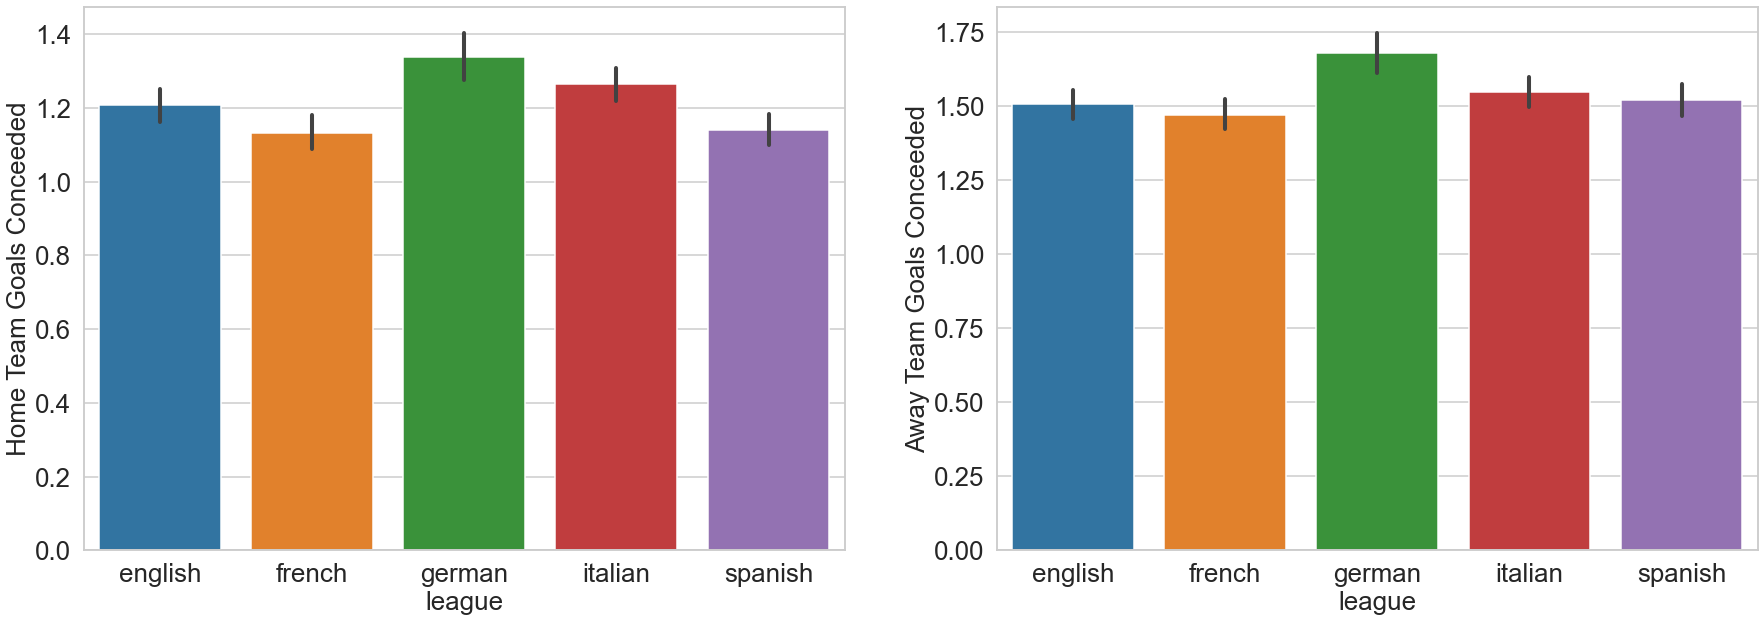

In [92]:
fig,(ax1,ax2) = plt.subplots(ncols=2)
sn.barplot(data = metadata[['Home Team Goals Conceeded','Away Team Goals Conceeded','league']], x = 'league', y = 'Home Team Goals Conceeded', ax = ax1 )
sn.barplot(data = metadata[['Home Team Goals Conceeded','Away Team Goals Conceeded','league']], x = 'league', y = 'Away Team Goals Conceeded', ax = ax2 )

### Part 4 - Explore Bivariate relationships

- Choose a reasoned set of variables to explore further.  You don't have to explore all possible pairs of variables, nor do we want to grade that much.  Choose 7 - 9 variables. One should be a variable that you'd like to predict (target variable) using the others (predictor variables). 
- List your predictor variables
- List your target variable
- Briefly describe why you have chosen these. 

Use any of the available visualizations from Seaborn to explore the relationships between the variables. Explore the relationships among the predictor variables as well as the relationship between each predictor variable and the target variable.  Which of the predictor variables are most strongly related?  Are there any interesting relationships between categorical predictors and numeric predictors?  If there are any dichotomous variables, does that influence any of the relationships? Are the relationships positive or negative? 

Below each plot, you should provide a description and interpretation of the plot.  Make sure to include why the variables in that plot were chosen and what you hope the reader would gain from it as well. 